

# Topic modeling 

In [1]:
# Importing modules
import pandas as pd
import os
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

import seaborn as sns; sns.set_theme()
from nltk.stem.porter import PorterStemmer

import numpy as np

import matplotlib.pyplot as plt

import copy

from gensim.models import CoherenceModel

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__ve

In [2]:
# functions
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


def get_corpus_id2word(data):
    # convert data to words
    data_words = list(sent_to_words(data))

    # remove stop words
    data_words = remove_stopwords(data_words)

    idocs = []
    for doc in data_words:
        lemmed = [WordNetLemmatizer().lemmatize(w) for w in doc]
#        stemmed = [PorterStemmer().stem(w) for w in doc]        
        idocs.append(lemmed)    
#        idocs.append(stemmed)    

    data_words = idocs
    
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)

    # Create Corpus
    texts = data_words

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    
    return corpus, id2word, idocs

stop_words = stopwords.words('english')
stop_words.extend(['data',
                   'driven',
                   'show',
                   'get',
                   'knowledge',
                   'yes'
                   'also',
                   'give',
                   'already',
                   'etc',
                   'also',
                   'based',
                   'approach',
                   'analytics',
                   'way',
                   'ensure',
                   'line',
                   'buttom',
                   'yes',
                   'would',
                   'thing',
                   'le',
                   'increase',
                   'use',
                   'using',
                   'make',
                   'made',
                   'definitely',
                   'one',
                   'maybe',
                   'something',
                   'people',
                   'new',
#                    'training',
                   'organisation',
                   'bmw',
                   'v',
                   'create',
                   'nan',
                   'session',
                   'could',
                   'better'
                  ])


In [3]:
def do_topic_model(int_df_text, int_i_stage, int_num_topics, int_i_random_state):
    # get data
    
    if len(int_i_stage) > 0:
        data = int_df_text[int_i_stage].values.tolist()    
#         print(data)
    else:
        data = int_df_text.values.tolist()    
        
    # get corpus and id2words
    corpus, id2word, lemmed = get_corpus_id2word(data)
    
    
    # Build LDA model

    # SOME_FIXED_SEED = 42

    # # before training/inference:
    # np.random.seed(SOME_FIXED_SEED)    

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=int_num_topics,
                                           random_state=int_i_random_state)  
    # print topics
    pprint(lda_model.print_topics())
    
    # Compute Perplexity
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmed, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)    
    
    # save the Keyword in the 10 topics in topics
    topic = lda_model.show_topics(formatted=False)
    ifield = [int_i_stage,topic]
    topics.append(ifield)

    # Visualize the topics
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+int_i_stage+'_'+str(int_num_topics))
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    if 1 == 1:

        LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)    

        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+int_i_stage+'_'+str(int_num_topics) +'.html')
    return LDAvis_prepared, topics


def visualize_topic_modeling(i_stage, i_topics, my_list):

    


    # populate dataframe with the weights
    ls_stage = []
    ls_topic = []
    ls_kword = []
    ls_weight = []

    # loop deur die stages, can change and improve this
    for stages in i_topics:
        if stages[0] == i_stage:
            for stage in stages[1]: 
                for topic in stage[1]:
                    ls_stage.append(stages[0])
                    ls_topic.append(stage[0])
                    ls_kword.append(topic[0])
                    ls_weight.append(topic[1]) 

    # initialise data of lists.
    data = {'Stage':ls_stage,
            'Topic':ls_topic,
            'Keyword': ls_kword,
            'Value': ls_weight}

    # Create DataFrame
    df = pd.DataFrame(data)

    df['Stage_topic'] = df['Stage'].astype(str).str[0] + df['Topic'].astype(str) 


    ls_words = df['Keyword'].unique().tolist()
    ls_stage_topic = df['Stage_topic'].unique().tolist()
    
    
    # heatmap dataframe empty
    df_heatmap = pd.DataFrame(np.array(np.zeros(len(df['Keyword'].unique()))),
                         columns=['col1'],
                         index=ls_words)

    print(df_heatmap.shape)    
    

    # populate heatmap
    for stage_topic in ls_stage_topic:

        ls_iweight = []
        for ikey in ls_words:

            ivalue = df['Value'][(df['Stage_topic']==stage_topic) & (df['Keyword'] == ikey)].values
            if len(ivalue) == 1:
                iweight = ivalue[0]
            else:
                iweight = 0 
    #         print(ikey, iweight)
            ls_iweight.append(iweight)

        df_heatmap[stage_topic] = ls_iweight
        df_heatmap

    df_heatmap = df_heatmap.drop(['col1'], axis=1)    

    # remove words that are not adding value    
    df_heatmap  = df_heatmap[~df_heatmap.index.isin(my_list)] 

    fig, ax = plt.subplots(figsize=(8,10))         # Sample figsize in inches

    cmap = copy.copy(plt.get_cmap("Blues"))
    cmap.set_under('#FFFFFF')

    sns.color_palette("Blues", as_cmap=True)
#     sns.heatmap(df_heatmap, linewidths=.5, ax=ax, cmap=cmap, cbar=False, vmin=1e-2, center=1e-100);      
    sns.heatmap(df_heatmap, linewidths=.5, ax=ax, cmap=cmap, cbar=False, vmin=((1e-2)*0.01), center=1e-300);           

In [4]:
df_text = pd.read_excel(open('data/sunet_data_1.xlsx','rb'))# Print head
df_text.head()

,Sheet 1,Sheet 2,Sheet 3,Sheet 4,Sheet 5,Sheet 6,Sheet 7,Sheet 8,Sheet 9,Sheet 10,...,Sheet 12,Sheet 13,Sheet 14,Sheet 15,Sheet 16,Sheet 17,Sheet 18,Sheet 19,Sheet 20,Sheet 21
0,One semester.,I did not take part in any specific project as...,NaN,The organisation was good. Dr Smith did a grea...,"I believe so. Yes. From what I remember, every...","No, I think we were quite adaptable, in the th...",Yes it was a positive environment and positive...,"I think there was an informal level of, you kn...",It was mostly informal. So it was a passing co...,I think so. Yes. I think we kept good record o...,...,"No, I think, I don't ever think there was the ...","Yes, I believe so. I think we all understood t...","There was a good, good level of teamwork. So e...","Yes, I think so. I think perhaps even better, ...","Yes, sub projects in the sense of the differen...","I don't know really, I think the most challeng...","I'm not too sure about other people, but defin...","Yes, I think so. I think who Lelanie is as a p...",I think the fact that we had collaboration acr...,I think the AREND project should be advertised...
1,I didn't do it for semesters. I think I was in...,So I was actually the deputy project manager f...,So I was actually the deputy project manager f...,"Yeah. So before I joined there was like, there...","Yes, yes, yes, definitely. Yeah. I mean, there...","Yes, definitely. Definitely. There were a few ...","Yes, I did. I'm not gonna take any names, or a...","Yes, definitely. Informally, and I think forma...",So there were group meetings. So we would have...,I think I was sometimes a bit too harsh. I was...,...,No. So most of them would speak behind that th...,"Oh, yes, definitely. So no issues there. Every...","Most of the team, I would say, was eager to co...",I think the input was a bit more than output. ...,Okay. The next question had to do with the sub...,"The most challenging aspect. I think for me, i...","Yes, yes, for myself, I think I've gained a lo...","Yeah, no, I think Dr. Smith was really good. I...","I think the technical aspects I would say, wha...",There is sort of like one of the informal poin...
2,So I started as a volunteer for Arend in the f...,"No, I constantly changed.The first year I was ...","So was like, so I was assigned. How can I say?","I would not say there was no coordination, but...","To an extent, yes. So for the time of the last...",Yeah. So I think the team that I was part of w...,Not to a full extent since some of the team me...,"Yes, definitely.",So this is another area that was a bit lacking...,"I wouldn't say very effectively, but yeah, so ...",...,No,I think team members were definitely on the sa...,"Uh, yes, yes. I would say the majority you'd h...","That's a tough question. I would say no, but t...",There was a basic level of communication betwe...,"Alright, I think I have an answer. So I think ...","Yes, definitely from my side time management, ...","Uh, the supervision of the team definitely als...","Umm, I think being exposed to a very dynamic a...","Oh, yes, I would really love to thank you for ..."
3,So I took Arend as Vac work. So for me it was ...,I did three projects there. So one was the des...,"I wasn't managing them directly, but the MPY 3...","So, what I was trying to do is get it to a ver...",I think we were at a point where we all basica...,I can’t comment on that because we didn't real...,It's sort of like a downward curve from the be...,"Yes, I think, yeah, that also depends on the p...",That was literally basically through WhatsApp ...,I think it was kind of effective to communicat...,...,"No, not from any any of the MNA meetings. Beca...","I think it was sort of a trade-off, more of wh...","Yes, quite often - it happened a lot because y...","Yes I think so. I mean, you're basically a stu...",I can't really comment. Not applicable to my e...,I would say that basically time management bec...,Maybe a little bit. I do consider myself someo...,"If I wasn't part of AREND, I w

In [5]:
list_columns = df_text.columns.to_list()
list_columns

['Sheet 1',
 'Sheet 2',
 'Sheet 3',
 'Sheet 4',
 'Sheet 5',
 'Sheet 6',
 'Sheet 7',
 'Sheet 8',
 'Sheet 9',
 'Sheet 10',
 'Sheet 11',
 'Sheet 12',
 'Sheet 13',
 'Sheet 14',
 'Sheet 15',
 'Sheet 16',
 'Sheet 17',
 'Sheet 18',
 'Sheet 19',
 'Sheet 20',
 'Sheet 21']

Only keep certain columns in the dataframe:

In [6]:
columns_to_use = ['Sheet 1',
 'Sheet 2',
 'Sheet 3',
 'Sheet 4',
 'Sheet 5',
 'Sheet 6',
 'Sheet 7',
 'Sheet 8',
 'Sheet 9',
 'Sheet 10',
 'Sheet 11',
 'Sheet 12',
 'Sheet 13',
 'Sheet 14',
 'Sheet 15',
 'Sheet 16',
 'Sheet 17',
 'Sheet 18',
 'Sheet 19',
 'Sheet 20',
 'Sheet 21']

df_text = df_text[columns_to_use]
df_text


,Sheet 1,Sheet 2,Sheet 3,Sheet 4,Sheet 5,Sheet 6,Sheet 7,Sheet 8,Sheet 9,Sheet 10,...,Sheet 12,Sheet 13,Sheet 14,Sheet 15,Sheet 16,Sheet 17,Sheet 18,Sheet 19,Sheet 20,Sheet 21
0,One semester.,I did not take part in any specific project as...,NaN,The organisation was good. Dr Smith did a grea...,"I believe so. Yes. From what I remember, every...","No, I think we were quite adaptable, in the th...",Yes it was a positive environment and positive...,"I think there was an informal level of, you kn...",It was mostly informal. So it was a passing co...,I think so. Yes. I think we kept good record o...,...,"No, I think, I don't ever think there was the ...","Yes, I believe so. I think we all understood t...","There was a good, good level of teamwork. So e...","Yes, I think so. I think perhaps even better, ...","Yes, sub projects in the sense of the differen...","I don't know really, I think the most challeng...","I'm not too sure about other people, but defin...","Yes, I think so. I think who Lelanie is as a p...",I think the fact that we had collaboration acr...,I think the AREND project should be advertised...
1,I didn't do it for semesters. I think I was in...,So I was actually the deputy project manager f...,So I was actually the deputy project manager f...,"Yeah. So before I joined there was like, there...","Yes, yes, yes, definitely. Yeah. I mean, there...","Yes, definitely. Definitely. There were a few ...","Yes, I did. I'm not gonna take any names, or a...","Yes, definitely. Informally, and I think forma...",So there were group meetings. So we would have...,I think I was sometimes a bit too harsh. I was...,...,No. So most of them would speak behind that th...,"Oh, yes, definitely. So no issues there. Every...","Most of the team, I would say, was eager to co...",I think the input was a bit more than output. ...,Okay. The next question had to do with the sub...,"The most challenging aspect. I think for me, i...","Yes, yes, for myself, I think I've gained a lo...","Yeah, no, I think Dr. Smith was really good. I...","I think the technical aspects I would say, wha...",There is sort of like one of the informal poin...
2,So I started as a volunteer for Arend in the f...,"No, I constantly changed.The first year I was ...","So was like, so I was assigned. How can I say?","I would not say there was no coordination, but...","To an extent, yes. So for the time of the last...",Yeah. So I think the team that I was part of w...,Not to a full extent since some of the team me...,"Yes, definitely.",So this is another area that was a bit lacking...,"I wouldn't say very effectively, but yeah, so ...",...,No,I think team members were definitely on the sa...,"Uh, yes, yes. I would say the majority you'd h...","That's a tough question. I would say no, but t...",There was a basic level of communication betwe...,"Alright, I think I have an answer. So I think ...","Yes, definitely from my side time management, ...","Uh, the supervision of the team definitely als...","Umm, I think being exposed to a very dynamic a...","Oh, yes, I would really love to thank you for ..."
3,So I took Arend as Vac work. So for me it was ...,I did three projects there. So one was the des...,"I wasn't managing them directly, but the MPY 3...","So, what I was trying to do is get it to a ver...",I think we were at a point where we all basica...,I can’t comment on that because we didn't real...,It's sort of like a downward curve from the be...,"Yes, I think, yeah, that also depends on the p...",That was literally basically through WhatsApp ...,I think it was kind of effective to communicat...,...,"No, not from any any of the MNA meetings. Beca...","I think it was sort of a trade-off, more of wh...","Yes, quite often - it happened a lot because y...","Yes I think so. I mean, you're basically a stu...",I can't really comment. Not applicable to my e...,I would say that basically time management bec...,Maybe a little bit. I do consider myself someo...,"If I wasn't part of AREND, I w

In [7]:
list_columns = df_text.columns.to_list()
list_columns

['Sheet 1',
 'Sheet 2',
 'Sheet 3',
 'Sheet 4',
 'Sheet 5',
 'Sheet 6',
 'Sheet 7',
 'Sheet 8',
 'Sheet 9',
 'Sheet 10',
 'Sheet 11',
 'Sheet 12',
 'Sheet 13',
 'Sheet 14',
 'Sheet 15',
 'Sheet 16',
 'Sheet 17',
 'Sheet 18',
 'Sheet 19',
 'Sheet 20',
 'Sheet 21']

## Data cleaning
Remove punctuation/lower casing

In [8]:
# synomymns 
df_text = df_text.replace({'company': 'organisation'}, regex=True)
df_text = df_text.replace({'organization': 'organisation'}, regex=True)
df_text = df_text.replace({'great': 'good'}, regex=True)
df_text = df_text.replace({'mng': 'management'}, regex=True)



In [9]:
# take our special characters
for i_column in list_columns:
    df_text[i_column]      = df_text[i_column].str.replace('[^a-zA-Z0-9]', ' ').values.astype(str)    

/var/folders/9w/x3bbs5h12z3dknlkzd24shc00000gn/T/ipykernel_70274/1835935124.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text[i_column]      = df_text[i_column].str.replace('[^a-zA-Z0-9]', ' ').values.astype(str)


## Data Analysis


###  'Sheet 1'

In [10]:
i_stage = 'Sheet 1'

[(0,
  '0.042*"arend" + 0.040*"year" + 0.036*"final" + 0.031*"module" + '
  '0.029*"week" + 0.028*"six" + 0.023*"work" + 0.020*"requirement" + '
  '0.018*"two" + 0.018*"semester"'),
 (1,
  '0.059*"year" + 0.038*"project" + 0.036*"arend" + 0.032*"research" + '
  '0.031*"semester" + 0.025*"four" + 0.023*"think" + 0.021*"mpy" + '
  '0.021*"part" + 0.021*"joined"'),
 (2,
  '0.070*"semester" + 0.058*"think" + 0.038*"year" + 0.036*"two" + '
  '0.028*"project" + 0.026*"arend" + 0.025*"part" + 0.023*"final" + '
  '0.019*"time" + 0.017*"mpy"')]

Perplexity:  -5.098394702058884

Coherence Score:  0.38348558815875955


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


(18, 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.010106 -0.034697       1        1  49.847389
1     -0.051970  0.011743       2        1  31.666083
0      0.041863  0.022954       3        1  18.486528, topic_info=           Term       Freq      Total Category  logprob  loglift
29         week   4.000000   4.000000  Default  30.0000  30.0000
25          six   4.000000   4.000000  Default  29.0000  29.0000
10        final   8.000000   8.000000  Default  28.0000  28.0000
8         arend  12.000000  12.000000  Default  27.0000  27.0000
24  requirement   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
6         three   0.654027   3.650438   Topic3  -4.7128  -0.0313
18      started   0.710892   4.997220   Topic3  -4.6295  -0.2620
38      project   0.892995  10.981265   Topic3  -4.4014  -0.8212
53     research   0.740413   6.360125   Topic3  -4.5888  -0.4625
5         think   0.864599  15.209799   Topic3  -4.4337  -1.1793

[172 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
39        1  0.691345      actually
39        2  0.345673      actually
39        3  0.345673      actually
132       1  0.670508         added
96        1  0.472583  aerodynamics
...     ...       ...           ...
22        1  0.687340          yeah
22        3  0.343670          yeah
7         1  0.446980          year
7         2  0.391107          year
7         3  0.167617          year

[174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

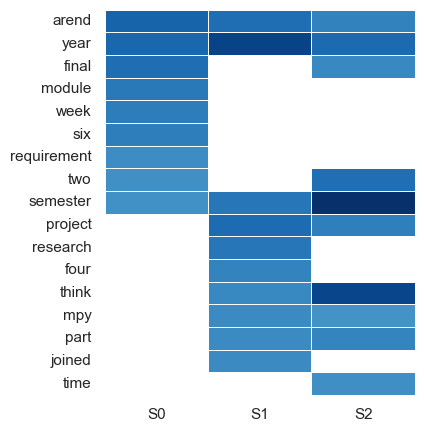

In [11]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.047*"week" + 0.047*"six" + 0.040*"year" + 0.039*"final" + 0.036*"module" '
  '+ 0.035*"work" + 0.033*"requirement" + 0.028*"arend" + 0.020*"vacation" + '
  '0.018*"took"'),
 (1,
  '0.066*"year" + 0.041*"arend" + 0.037*"research" + 0.030*"four" + '
  '0.029*"still" + 0.028*"started" + 0.023*"second" + 0.021*"project" + '
  '0.020*"think" + 0.019*"semester"'),
 (2,
  '0.078*"semester" + 0.067*"think" + 0.042*"year" + 0.036*"two" + '
  '0.027*"part" + 0.022*"project" + 0.019*"final" + 0.018*"time" + '
  '0.016*"involved" + 0.015*"module"'),
 (3,
  '0.049*"arend" + 0.046*"project" + 0.042*"semester" + 0.038*"year" + '
  '0.032*"mpy" + 0.032*"final" + 0.025*"think" + 0.022*"two" + 0.022*"joined" '
  '+ 0.021*"part"')]

Perplexity:  -5.12968082597644

Coherence Score:  0.3820269587670214
(24, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.014945 -0.016220       1        1  39.362303
2      0.028737 -0.053569       2        1  30.158198
1     -0.081192  0.007042       3        1  24.375987
0      0.037510  0.062746       4        1   6.103512, topic_info=        Term      Freq      Total Category  logprob  loglift
10     final  8.000000   8.000000  Default  30.0000  30.0000
29      week  3.000000   3.000000  Default  29.0000  29.0000
25       six  3.000000   3.000000  Default  28.0000  28.0000
30      work  3.000000   3.000000  Default  27.0000  27.0000
14    module  6.000000   6.000000  Default  26.0000  26.0000
..       ...       ...        ...      ...      ...      ...
5      think  0.176800  14.003144   Topic4  -4.9128  -1.5757
38   project  0.167097  11.995593   Topic4  -4.9692  -1.4774
75   working  0.137770   2.179866   Topic4  -5.1622   0.0349
15       mpy  0.150433   8.036627   Topic4  -5.0743  -1.1819
39  actually  0.138673   2.769961   Topic4  -5.1557  -0.1982

[217 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
39        1  0.361016      actually
39        2  0.361016      actually
39        3  0.361016      actually
132       2  0.763005         added
96        1  0.804893  aerodynamics
...     ...       ...           ...
22        2  0.354744          yeah
7         1  0.330238          year
7         2  0.275198          year
7         3  0.330238          year
7         4  0.055040          year

[199 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

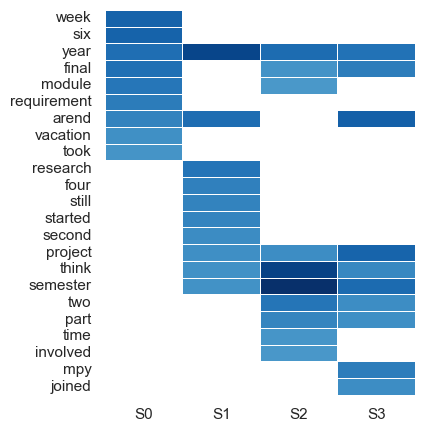

In [12]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.053*"week" + 0.052*"six" + 0.042*"final" + 0.042*"year" + 0.042*"module" '
  '+ 0.036*"requirement" + 0.036*"work" + 0.035*"arend" + 0.020*"meet" + '
  '0.020*"took"'),
 (1,
  '0.067*"year" + 0.039*"arend" + 0.037*"four" + 0.036*"research" + '
  '0.034*"mpy" + 0.030*"started" + 0.029*"still" + 0.028*"semester" + '
  '0.028*"project" + 0.023*"second"'),
 (2,
  '0.080*"think" + 0.068*"semester" + 0.038*"year" + 0.037*"two" + '
  '0.021*"time" + 0.021*"arend" + 0.019*"part" + 0.019*"mpy" + '
  '0.018*"involved" + 0.017*"final"'),
 (3,
  '0.061*"semester" + 0.053*"project" + 0.043*"arend" + 0.036*"year" + '
  '0.032*"final" + 0.028*"joined" + 0.025*"part" + 0.024*"two" + '
  '0.022*"research" + 0.020*"think"'),
 (4,
  '0.044*"year" + 0.041*"semester" + 0.038*"project" + 0.035*"arend" + '
  '0.031*"part" + 0.029*"two" + 0.028*"module" + 0.028*"final" + 0.019*"think" '
  '+ 0.017*"research"')]

Perplexity:  -5.305161088370346

Coherence Score:  0.351809414216007
(24, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.031941 -0.041053       1        1  32.569020
2     -0.023478 -0.024668       2        1  29.670134
1     -0.088519  0.043411       3        1  19.421959
0      0.069713  0.073171       4        1   9.659052
3      0.010344 -0.050861       5        1   8.679835, topic_info=        Term       Freq      Total Category  logprob  loglift
29      week   4.000000   4.000000  Default  30.0000  30.0000
25       six   4.000000   4.000000  Default  29.0000  29.0000
0   semester  17.000000  17.000000  Default  28.0000  28.0000
38   project  10.000000  10.000000  Default  27.0000  27.0000
10     final   8.000000   8.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
5      think   0.678624  14.282048   Topic5  -3.9199  -0.6025
44    second   0.375402   4.110701   Topic5  -4.5119   0.0508
15       mpy   0.385653   6.913211   Topic5  -4.4850  -0.4421
14    module   0.324836   7.867024   Topic5  -4.6566  -0.7429
26      took   0.254994   3.221614   Topic5  -4.8987  -0.0922

[260 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
39        1  0.324003      actually
39        2  0.324003      actually
39        3  0.324003      actually
132       2  0.726807         added
96        1  0.865029  aerodynamics
...     ...       ...           ...
7         1  0.331224          year
7         2  0.220816          year
7         3  0.276020          year
7         4  0.110408          year
7         5  0.055204          year

[194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

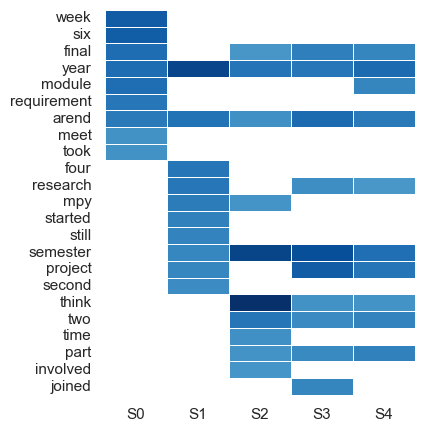

In [13]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 2'

In [14]:
i_stage = 'Sheet 2'

[(0,
  '0.029*"project" + 0.025*"year" + 0.017*"arend" + 0.015*"catapult" + '
  '0.014*"final" + 0.014*"system" + 0.012*"design" + 0.012*"worked" + '
  '0.012*"remember" + 0.011*"team"'),
 (1,
  '0.024*"project" + 0.021*"design" + 0.019*"team" + 0.016*"part" + '
  '0.016*"arend" + 0.015*"actually" + 0.013*"time" + 0.013*"like" + '
  '0.013*"composite" + 0.013*"u"'),
 (2,
  '0.037*"project" + 0.031*"arend" + 0.019*"work" + 0.016*"experience" + '
  '0.014*"year" + 0.013*"time" + 0.013*"part" + 0.013*"mpy" + 0.012*"think" + '
  '0.012*"claimed"')]

Perplexity:  -5.872445621583015

Coherence Score:  0.30666105673912586
(21, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.034775  0.012621       1        1  42.199183
0     -0.001936 -0.023346       2        1  39.366743
2      0.036711  0.010725       3        1  18.434074, topic_info=           Term       Freq      Total Category  logprob  loglift
47        arend   8.000000   8.000000  Default  30.0000  30.0000
7       project  12.000000  12.000000  Default  29.0000  29.0000
155  experience   2.000000   2.000000  Default  28.0000  28.0000
144        work   4.000000   4.000000  Default  27.0000  27.0000
229     claimed   1.000000   1.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
80       system   0.648444   4.016705   Topic3  -4.8244  -0.1327
102         uav   0.631107   3.990166   Topic3  -4.8515  -0.1531
43        thing   0.580680   2.519645   Topic3  -4.9348   0.2233
40      student   0.583575   3.297230   Topic3  -4.9298  -0.0407
113       final   0.581830   4.820720   Topic3  -4.9328  -0.4235

[183 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
10        1  0.705728  actually
10        2  0.235243  actually
221       3  0.930591       add
228       3  0.951461  although
168       2  0.778741   another
...     ...       ...       ...
104       1  0.763897      yeah
104       2  0.381948      yeah
86        1  0.271320      year
86        2  0.542639      year
86        3  0.135660      year

[183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

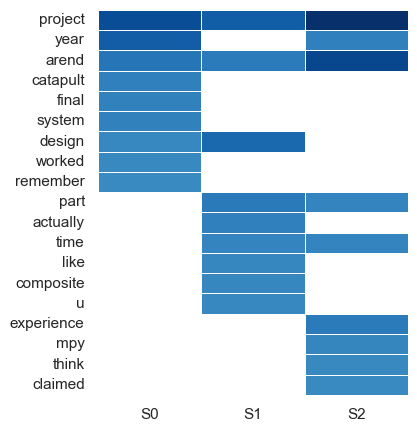

In [15]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.027*"project" + 0.026*"year" + 0.016*"worked" + 0.016*"arend" + '
  '0.015*"remember" + 0.013*"final" + 0.013*"system" + 0.012*"mrn" + '
  '0.012*"catapult" + 0.012*"mpy"'),
 (1,
  '0.027*"project" + 0.022*"arend" + 0.020*"part" + 0.019*"composite" + '
  '0.019*"u" + 0.016*"design" + 0.015*"time" + 0.013*"wanted" + 0.013*"uav" + '
  '0.012*"done"'),
 (2,
  '0.031*"arend" + 0.025*"project" + 0.023*"work" + 0.023*"experience" + '
  '0.017*"time" + 0.016*"think" + 0.016*"claimed" + 0.014*"year" + 0.014*"mpy" '
  '+ 0.013*"uav"'),
 (3,
  '0.039*"project" + 0.028*"team" + 0.027*"design" + 0.017*"work" + '
  '0.016*"arend" + 0.016*"helped" + 0.016*"catapult" + 0.015*"actually" + '
  '0.014*"year" + 0.014*"mpy"')]

Perplexity:  -5.910865689385427

Coherence Score:  0.2871982036564953
(25, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.068355 -0.027154       1        1  31.443313
1      0.009327  0.049262       2        1  25.627300
0     -0.027377  0.012408       3        1  24.033849
2     -0.050304 -0.034517       4        1  18.895539, topic_info=           Term      Freq     Total Category  logprob  loglift
155  experience  3.000000  3.000000  Default  30.0000  30.0000
166           u  2.000000  2.000000  Default  29.0000  29.0000
229     claimed  1.000000  1.000000  Default  28.0000  28.0000
144        work  5.000000  5.000000  Default  27.0000  27.0000
55    composite  3.000000  3.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
68          mrn  0.790686  3.150544   Topic4  -4.6508   0.2838
104        yeah  0.761785  2.545627   Topic4  -4.6881   0.4598
16       design  0.771503  6.914700   Topic4  -4.6754  -0.5268
43        thing  0.723196  2.599152   Topic4  -4.7400   0.3870
120        well  0.722801  3.168825   Topic4  -4.7406   0.1883

[229 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
10        1  0.482291  actually
10        2  0.241145  actually
10        3  0.241145  actually
221       4  0.813472       add
123       1  0.716796    almost
...     ...       ...       ...
104       4  0.392831      yeah
86        1  0.282897      year
86        2  0.141448      year
86        3  0.424345      year
86        4  0.141448      year

[233 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

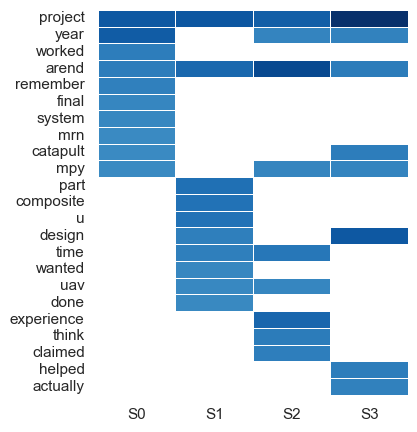

In [16]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.020*"started" + 0.018*"project" + 0.018*"worked" + 0.017*"catapult" + '
  '0.016*"year" + 0.016*"arend" + 0.016*"remember" + 0.014*"uav" + '
  '0.014*"part" + 0.014*"done"'),
 (1,
  '0.022*"u" + 0.021*"composite" + 0.018*"part" + 0.018*"arend" + '
  '0.018*"design" + 0.017*"project" + 0.016*"time" + 0.015*"wanted" + '
  '0.014*"actually" + 0.014*"like"'),
 (2,
  '0.050*"project" + 0.032*"arend" + 0.030*"work" + 0.025*"experience" + '
  '0.019*"group" + 0.017*"year" + 0.014*"manufacturing" + 0.014*"helped" + '
  '0.014*"part" + 0.013*"number"'),
 (3,
  '0.041*"team" + 0.037*"project" + 0.028*"design" + 0.023*"catapult" + '
  '0.019*"year" + 0.018*"mpy" + 0.017*"arend" + 0.017*"final" + 0.015*"like" + '
  '0.015*"work"'),
 (4,
  '0.033*"project" + 0.026*"year" + 0.026*"arend" + 0.023*"system" + '
  '0.021*"mrn" + 0.016*"redesign" + 0.016*"parachute" + 0.015*"battery" + '
  '0.015*"mpy" + 0.014*"part"')]

Perplexity:  -5.9922770996616315

Coherence Score:  0.42018167544193263
(3

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.074106 -0.029321       1        1  29.630056
0     -0.063598 -0.012318       2        1  27.165743
4     -0.038355  0.068858       3        1  18.988049
1     -0.028717 -0.065314       4        1  12.247509
2      0.056564  0.038096       5        1  11.968644, topic_info=           Term       Freq      Total Category  logprob  loglift
42         team   7.000000   7.000000  Default  30.0000  30.0000
7       project  13.000000  13.000000  Default  29.0000  29.0000
144        work   5.000000   5.000000  Default  28.0000  28.0000
155  experience   2.000000   2.000000  Default  27.0000  27.0000
166           u   1.000000   1.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
86         year   0.878057   7.833860   Topic5  -4.0894  -0.0656
6          part   0.723828   5.427391   Topic5  -4.2825   0.1082
120        well   0.544993   2.899833   Topic5  -4.5663   0.4512
100        time   0.651277   4.995072   Topic5  -4.3882   0.0856
113       final   0.572261   4.999102   Topic5  -4.5175  -0.0445

[255 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
192       2  0.772816    actual
10        1  0.512350  actually
10        2  0.256175  actually
10        4  0.256175  actually
221       5  0.901787       add
...     ...       ...       ...
104       4  0.449333      yeah
86        1  0.255302      year
86        2  0.255302      year
86        3  0.255302      year
86        5  0.127651      year

[227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

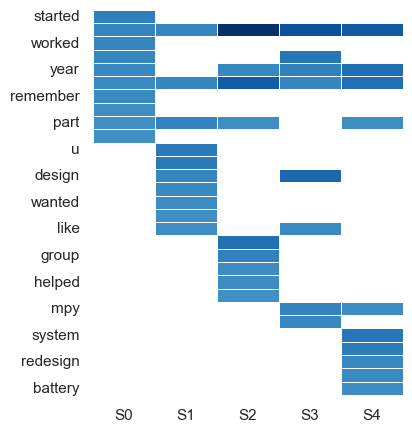

In [17]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 3'

In [18]:
i_stage = 'Sheet 3'

[(0,
  '0.031*"work" + 0.025*"think" + 0.016*"mpy" + 0.014*"project" + 0.014*"much" '
  '+ 0.014*"done" + 0.013*"student" + 0.013*"well" + 0.013*"team" + '
  '0.013*"hour"'),
 (1,
  '0.024*"design" + 0.022*"work" + 0.021*"mpy" + 0.012*"think" + 0.012*"say" + '
  '0.011*"test" + 0.011*"whatever" + 0.011*"towards" + 0.010*"like" + '
  '0.010*"easy"'),
 (2,
  '0.034*"mpy" + 0.018*"work" + 0.017*"actually" + 0.014*"think" + '
  '0.014*"design" + 0.014*"team" + 0.013*"project" + 0.012*"bit" + '
  '0.012*"want" + 0.011*"direction"')]

Perplexity:  -5.917683365016148

Coherence Score:  0.37874250918869984
(21, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.031726  0.019129       1        1  38.957549
0      0.048901  0.004213       2        1  36.144916
1     -0.017175 -0.023342       3        1  24.897535, topic_info=        Term      Freq     Total Category  logprob  loglift
2     design  4.000000  4.000000  Default  30.0000  30.0000
187     much  2.000000  2.000000  Default  29.0000  29.0000
35   towards  1.000000  1.000000  Default  28.0000  28.0000
184  depends  1.000000  1.000000  Default  27.0000  27.0000
64      test  2.000000  2.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
33      side  0.772750  2.541674   Topic3  -4.8738   0.1998
158     want  0.818050  3.212960   Topic3  -4.8168   0.0224
24      task  0.756089  2.550593   Topic3  -4.8955   0.1745
91       bit  0.811371  3.883787   Topic3  -4.8250  -0.1754
94      hour  0.803277  3.880608   Topic3  -4.8350  -0.1846

[191 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.655598  actually
0         2  0.218533  actually
0         3  0.218533  actually
210       2  0.512369    always
48        1  0.534769        am
...     ...       ...       ...
103       2  0.517967      work
103       3  0.207187      work
38        1  0.758314      yeah
38        2  0.379157      yeah
139       2  0.770649      year

[198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

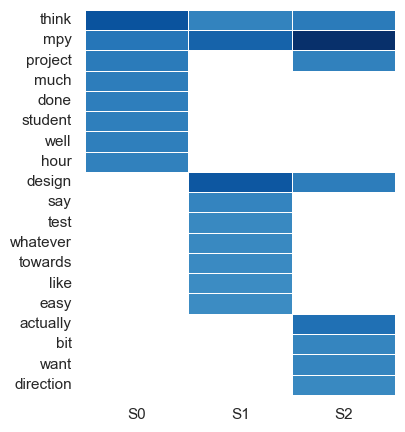

In [19]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.030*"work" + 0.028*"think" + 0.020*"student" + 0.018*"much" + '
  '0.018*"project" + 0.016*"experience" + 0.015*"well" + 0.014*"year" + '
  '0.014*"time" + 0.014*"depends"'),
 (1,
  '0.035*"design" + 0.025*"mpy" + 0.020*"work" + 0.018*"direction" + '
  '0.017*"towards" + 0.013*"well" + 0.013*"think" + 0.012*"easy" + '
  '0.011*"whatever" + 0.011*"part"'),
 (2,
  '0.047*"mpy" + 0.022*"want" + 0.021*"work" + 0.020*"think" + 0.017*"bit" + '
  '0.014*"really" + 0.014*"design" + 0.013*"actually" + 0.013*"training" + '
  '0.012*"challenging"'),
 (3,
  '0.023*"team" + 0.023*"work" + 0.020*"say" + 0.020*"like" + 0.018*"mpy" + '
  '0.018*"actually" + 0.015*"testing" + 0.015*"test" + 0.013*"project" + '
  '0.012*"meeting"')]

Perplexity:  -5.881539591427507

Coherence Score:  0.3636683247726971
(29, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.056131 -0.052998       1        1  44.050499
0      0.089209 -0.015673       2        1  21.737775
2     -0.023543  0.065815       3        1  19.988014
1     -0.009536  0.002855       4        1  14.223712, topic_info=          Term      Freq     Total Category  logprob  loglift
2       design  4.000000  4.000000  Default  30.0000  30.0000
20         mpy  9.000000  9.000000  Default  29.0000  29.0000
3    direction  2.000000  2.000000  Default  28.0000  28.0000
158       want  3.000000  3.000000  Default  27.0000  27.0000
35     towards  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
70       think  0.725225  6.614122   Topic4  -4.3774  -0.2602
36    whatever  0.635986  3.792454   Topic4  -4.5087   0.1647
29        need  0.585305  3.176817   Topic4  -4.5917   0.2588
102     really  0.560465  3.077599   Topic4  -4.6351   0.2471
68       arend  0.549526  2.433519   Topic4  -4.6548   0.4622

[214 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.604789  actually
0         3  0.201596  actually
210       2  0.585262    always
48        1  0.888734        am
140       3  0.812108  anything
...     ...       ...       ...
38        2  0.445916      yeah
38        3  0.445916      yeah
38        4  0.445916      yeah
139       1  0.409122      year
139       2  0.409122      year

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

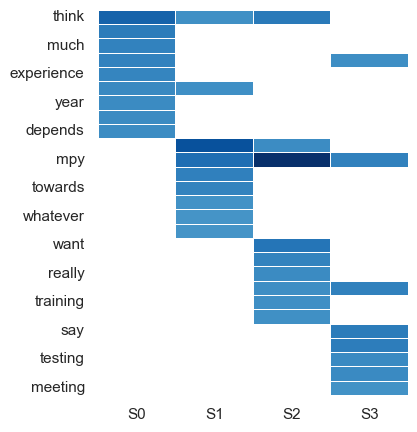

In [20]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.028*"student" + 0.022*"work" + 0.021*"project" + 0.021*"experience" + '
  '0.020*"side" + 0.020*"drive" + 0.019*"always" + 0.016*"think" + '
  '0.013*"well" + 0.012*"done"'),
 (1,
  '0.045*"design" + 0.024*"direction" + 0.022*"towards" + 0.015*"well" + '
  '0.015*"think" + 0.014*"easy" + 0.014*"module" + 0.014*"task" + '
  '0.014*"build" + 0.014*"necessarily"'),
 (2,
  '0.035*"want" + 0.034*"mpy" + 0.027*"work" + 0.021*"actually" + '
  '0.020*"training" + 0.019*"challenging" + 0.019*"report" + 0.019*"bit" + '
  '0.019*"really" + 0.018*"practical"'),
 (3,
  '0.033*"team" + 0.024*"actually" + 0.021*"work" + 0.021*"mpy" + '
  '0.021*"project" + 0.018*"like" + 0.018*"meeting" + 0.017*"say" + '
  '0.017*"test" + 0.017*"testing"'),
 (4,
  '0.036*"mpy" + 0.035*"think" + 0.034*"work" + 0.020*"hour" + 0.016*"bit" + '
  '0.016*"holiday" + 0.016*"finish" + 0.016*"december" + 0.014*"arend" + '
  '0.013*"worked"')]

Perplexity:  -5.880423131541078

Coherence Score:  0.44955130860649256
(3

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.096724  0.036343       1        1  43.112155
3     -0.098355  0.002926       2        1  23.391843
0      0.054401 -0.070742       3        1  12.963899
2     -0.011164  0.063417       4        1  11.455932
1     -0.041605 -0.031944       5        1   9.076171, topic_info=          Term      Freq      Total Category  logprob  loglift
2       design  4.000000   4.000000  Default  30.0000  30.0000
158       want  2.000000   2.000000  Default  29.0000  29.0000
11        team  4.000000   4.000000  Default  28.0000  28.0000
0     actually  4.000000   4.000000  Default  27.0000  27.0000
3    direction  2.000000   2.000000  Default  26.0000  26.0000
..         ...       ...        ...      ...      ...      ...
37        well  0.570424   3.928222   Topic5  -4.1682   0.4700
61   preparing  0.244580   1.699002   Topic5  -5.0150   0.4613
36    whatever  0.456475   4.043366   Topic5  -4.3911   0.2182
70       think  0.565747   8.384969   Topic5  -4.1764  -0.2965
20         mpy  0.462325  10.548924   Topic5  -4.3783  -0.7280

[231 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.249912  actually
0         2  0.499825  actually
0         4  0.249912  actually
210       3  0.552723    always
48        2  0.587128        am
...     ...       ...       ...
38        1  0.388338      yeah
38        3  0.388338      yeah
38        5  0.388338      yeah
139       1  0.703878      year
139       3  0.351939      year

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 3, 2])

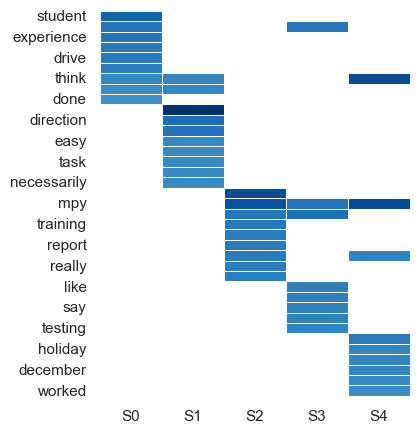

In [21]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 4'

In [22]:
i_stage = 'Sheet 4'

[(0,
  '0.033*"student" + 0.027*"team" + 0.015*"like" + 0.015*"lelanie" + '
  '0.012*"work" + 0.011*"project" + 0.011*"leadership" + 0.011*"member" + '
  '0.010*"mrn" + 0.010*"sort"'),
 (1,
  '0.022*"lelanie" + 0.020*"student" + 0.020*"like" + 0.010*"report" + '
  '0.010*"work" + 0.010*"time" + 0.010*"structure" + 0.009*"think" + '
  '0.009*"project" + 0.009*"really"'),
 (2,
  '0.022*"like" + 0.016*"department" + 0.013*"plan" + 0.012*"uav" + '
  '0.012*"structure" + 0.011*"year" + 0.010*"project" + 0.009*"u" + '
  '0.009*"gimbal" + 0.008*"camera"')]

Perplexity:  -6.215440559740856

Coherence Score:  0.30523073232815257
(22, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000371 -0.029387       1        1  52.272858
0     -0.038407  0.014905       2        1  28.524521
2      0.038778  0.014482       3        1  19.202622, topic_info=           Term       Freq      Total Category  logprob  loglift
76         team   9.000000   9.000000  Default  30.0000  30.0000
60   department   4.000000   4.000000  Default  29.0000  29.0000
101     student  17.000000  17.000000  Default  28.0000  28.0000
112        plan   4.000000   4.000000  Default  27.0000  27.0000
261         uav   3.000000   3.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
32         work   1.207500   8.205787   Topic3  -4.8571  -0.2662
44          say   1.005970   5.052497   Topic3  -5.0397   0.0362
99         sort   0.902302   4.225805   Topic3  -5.1485   0.1061
101     student   0.904158  17.151820   Topic3  -5.1464  -1.2927
109     lelanie   0.879059  13.595839   Topic3  -5.1746  -1.0885

[198 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
84        2  0.822500       advance
57        3  0.812069  aerodynamics
342       3  0.859050        agreed
86        2  0.823350    assistance
263       1  0.373645          back
...     ...       ...           ...
363       1  0.642615      workshop
197       1  0.447447          year
197       2  0.298298          year
197       3  0.298298          year
219       2  0.563876       younger

[228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

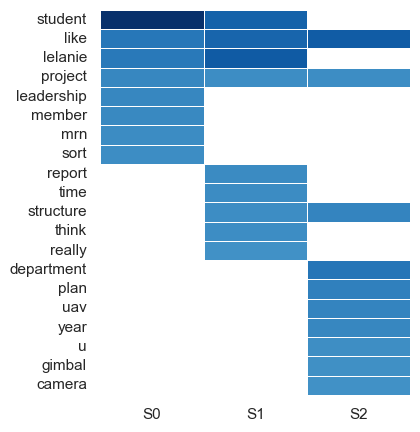

In [23]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.030*"team" + 0.028*"student" + 0.014*"like" + 0.014*"lelanie" + '
  '0.013*"leadership" + 0.012*"sort" + 0.011*"project" + 0.011*"structure" + '
  '0.011*"member" + 0.011*"work"'),
 (1,
  '0.019*"lelanie" + 0.015*"project" + 0.013*"student" + 0.013*"structure" + '
  '0.013*"like" + 0.012*"time" + 0.010*"work" + 0.009*"team" + 0.009*"year" + '
  '0.008*"leadership"'),
 (2,
  '0.021*"department" + 0.017*"like" + 0.017*"uav" + 0.015*"structure" + '
  '0.014*"plan" + 0.014*"year" + 0.013*"gimbal" + 0.013*"camera" + '
  '0.011*"project" + 0.011*"smith"'),
 (3,
  '0.036*"student" + 0.029*"like" + 0.022*"lelanie" + 0.013*"work" + '
  '0.013*"directly" + 0.013*"dr" + 0.012*"report" + 0.012*"day" + '
  '0.012*"coordination" + 0.011*"say"')]

Perplexity:  -6.307867113091006

Coherence Score:  0.2893966184339184
(24, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.005810  0.009853       1        1  31.325986
3     -0.069431 -0.034457       2        1  28.047242
0      0.000220  0.055894       3        1  25.306518
2      0.075022 -0.031290       4        1  15.320254, topic_info=           Term       Freq      Total Category  logprob  loglift
60   department   3.000000   3.000000  Default  30.0000  30.0000
261         uav   3.000000   3.000000  Default  29.0000  29.0000
101     student  17.000000  17.000000  Default  28.0000  28.0000
253      gimbal   2.000000   2.000000  Default  27.0000  27.0000
251      camera   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
255      little   0.763525   2.587283   Topic4  -5.0896   0.6556
133        help   0.793262   4.056975   Topic4  -5.0514   0.2440
142    remember   0.663050   2.715278   Topic4  -5.2307   0.4662
32         work   0.695805   8.376195   Topic4  -5.1825  -0.6121
76         team   0.694723  11.025717   Topic4  -5.1840  -0.8885

[251 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
156       2  0.381894  actually
156       4  0.381894  actually
84        3  0.742537   advance
342       4  0.851300    agreed
166       1  0.711772    anyone
...     ...       ...       ...
197       1  0.303235      year
197       2  0.151618      year
197       3  0.303235      year
197       4  0.303235      year
219       3  0.493431   younger

[307 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

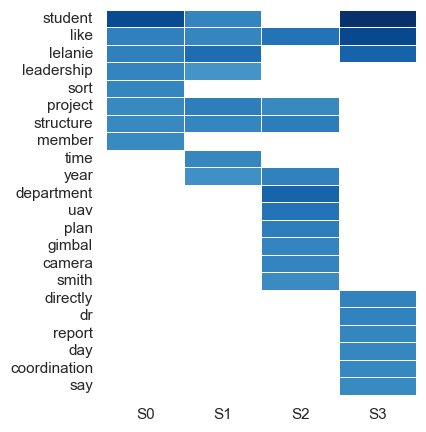

In [24]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.039*"student" + 0.036*"team" + 0.016*"lelanie" + 0.015*"sort" + '
  '0.015*"project" + 0.015*"leadership" + 0.015*"like" + 0.013*"member" + '
  '0.013*"supervisor" + 0.012*"structure"'),
 (1,
  '0.023*"lelanie" + 0.016*"student" + 0.013*"structure" + 0.013*"like" + '
  '0.013*"time" + 0.012*"project" + 0.011*"mrn" + 0.010*"meeting" + '
  '0.010*"report" + 0.009*"working"'),
 (2,
  '0.032*"department" + 0.020*"like" + 0.019*"structure" + 0.019*"uav" + '
  '0.018*"plan" + 0.014*"gimbal" + 0.014*"camera" + 0.013*"much" + 0.012*"u" + '
  '0.012*"sense"'),
 (3,
  '0.030*"like" + 0.023*"student" + 0.018*"dr" + 0.017*"work" + '
  '0.016*"directly" + 0.015*"day" + 0.014*"coordination" + 0.013*"say" + '
  '0.013*"report" + 0.013*"smith"'),
 (4,
  '0.023*"lelanie" + 0.020*"student" + 0.015*"think" + 0.015*"like" + '
  '0.015*"u" + 0.014*"lot" + 0.013*"team" + 0.012*"really" + '
  '0.011*"leadership" + 0.011*"year"')]

Perplexity:  -6.328045125429061

Coherence Score:  0.307706359186084

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.024476  0.033294       1        1  26.568988
0      0.028871  0.071066       2        1  21.174717
1     -0.007925  0.007207       3        1  19.752413
3     -0.106900 -0.024050       4        1  19.009546
2      0.061478 -0.087518       5        1  13.494336, topic_info=           Term       Freq      Total Category  logprob  loglift
60   department   4.000000   4.000000  Default  30.0000  30.0000
76         team  11.000000  11.000000  Default  29.0000  29.0000
261         uav   3.000000   3.000000  Default  28.0000  28.0000
5           day   3.000000   3.000000  Default  27.0000  27.0000
101     student  17.000000  17.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
87         came   0.738392   3.431481   Topic5  -4.9962   0.4666
142    remember   0.722622   2.734609   Topic5  -5.0178   0.6720
94       needed   0.738787   4.688359   Topic5  -4.9956   0.1551
99         sort   0.729902   4.867047   Topic5  -5.0077   0.1056
133        help   0.722995   3.995219   Topic5  -5.0173   0.2934

[293 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
84        2  0.721367       advance
57        5  0.780449  aerodynamics
342       5  0.781976        agreed
118       1  0.702402       anybody
166       3  0.741864        anyone
...     ...       ...           ...
197       2  0.145419          year
197       3  0.145419          year
197       4  0.145419          year
197       5  0.145419          year
219       2  0.475443       younger

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

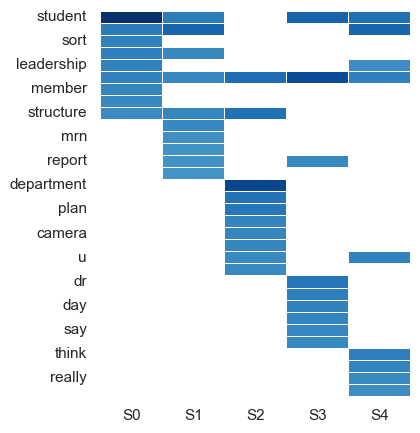

In [25]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 5'

In [26]:
i_stage = 'Sheet 5'

[(0,
  '0.020*"project" + 0.019*"skill" + 0.017*"student" + 0.016*"know" + '
  '0.015*"work" + 0.014*"working" + 0.012*"task" + 0.012*"u" + 0.011*"master" '
  '+ 0.011*"design"'),
 (1,
  '0.040*"skill" + 0.018*"like" + 0.014*"time" + 0.014*"student" + '
  '0.012*"experience" + 0.012*"good" + 0.011*"thing" + 0.010*"part" + '
  '0.010*"much" + 0.010*"think"'),
 (2,
  '0.026*"skill" + 0.024*"project" + 0.020*"like" + 0.016*"set" + 0.013*"time" '
  '+ 0.011*"student" + 0.011*"thing" + 0.010*"certain" + 0.010*"yeah" + '
  '0.010*"say"')]

Perplexity:  -5.944553470424668

Coherence Score:  0.4598501660440603
(22, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.013447  0.026566       1        1  38.009344
0     -0.040386 -0.005324       2        1  32.340554
1      0.026940 -0.021242       3        1  29.650102, topic_info=         Term       Freq      Total Category  logprob  loglift
8       skill  15.000000  15.000000  Default  30.0000  30.0000
118      task   3.000000   3.000000  Default  29.0000  29.0000
92     design   3.000000   3.000000  Default  28.0000  28.0000
111    master   3.000000   3.000000  Default  27.0000  27.0000
23       know   5.000000   5.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
7    remember   1.182612   4.605102   Topic3  -4.9373  -0.1437
14    certain   1.132854   4.169548   Topic3  -4.9803  -0.0874
133       got   0.997923   2.799116   Topic3  -5.1071   0.1843
6     project   1.315153  10.106408   Topic3  -4.8311  -0.8235
31        set   1.154239   5.621304   Topic3  -4.9616  -0.3674

[198 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
173       2  0.386591  absolutely
173       3  0.386591  absolutely
34        1  0.703088    actively
176       2  0.402693      almost
176       3  0.402693      almost
...     ...       ...         ...
237       3  0.371270    workshop
33        1  0.495131        yeah
33        2  0.247566        yeah
126       1  0.375821        year
126       2  0.375821        year

[231 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

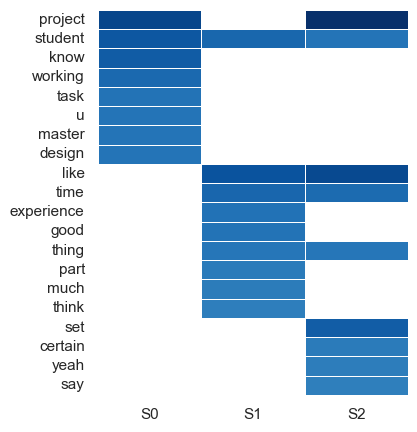

In [27]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.019*"skill" + 0.019*"project" + 0.019*"know" + 0.016*"student" + '
  '0.013*"mean" + 0.012*"working" + 0.012*"design" + 0.012*"u" + 0.012*"task" '
  '+ 0.011*"work"'),
 (1,
  '0.043*"skill" + 0.020*"like" + 0.014*"student" + 0.014*"thing" + '
  '0.014*"time" + 0.012*"experience" + 0.011*"much" + 0.010*"documentation" + '
  '0.010*"see" + 0.010*"well"'),
 (2,
  '0.034*"skill" + 0.024*"like" + 0.022*"project" + 0.017*"time" + 0.016*"set" '
  '+ 0.013*"thing" + 0.012*"student" + 0.011*"part" + 0.011*"think" + '
  '0.011*"help"'),
 (3,
  '0.022*"project" + 0.019*"work" + 0.019*"skill" + 0.015*"student" + '
  '0.012*"want" + 0.012*"good" + 0.012*"working" + 0.010*"absolutely" + '
  '0.010*"done" + 0.010*"yeah"')]

Perplexity:  -6.192335198613473

Coherence Score:  0.4497174217170212
(27, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.044027 -0.024954       1        1  37.639618
1     -0.038713  0.028686       2        1  23.406315
3      0.041935  0.022794       3        1  22.111806
2     -0.047250 -0.026526       4        1  16.842261, topic_info=          Term       Freq      Total Category  logprob  loglift
8        skill  15.000000  15.000000  Default  30.0000  30.0000
24        like   7.000000   7.000000  Default  29.0000  29.0000
6      project   9.000000   9.000000  Default  28.0000  28.0000
69       thing   4.000000   4.000000  Default  27.0000  27.0000
4         part   2.000000   2.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
81  individual   0.655965   3.183391   Topic4  -4.9611   0.2017
72           u   0.692920   4.713683   Topic4  -4.9063  -0.1360
79        case   0.595804   2.314309   Topic4  -5.0573   0.4243
75        well   0.669429   4.930762   Topic4  -4.9408  -0.2155
25        mean   0.622008   4.239059   Topic4  -5.0143  -0.1379

[235 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
173       1  0.374019    absolutely
173       2  0.374019    absolutely
173       3  0.374019    absolutely
34        4  0.915910      actively
11        1  0.703399  aeronautical
...     ...       ...           ...
33        1  0.501120          yeah
33        3  0.250560          yeah
33        4  0.250560          yeah
126       1  0.388025          year
126       3  0.388025          year

[261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

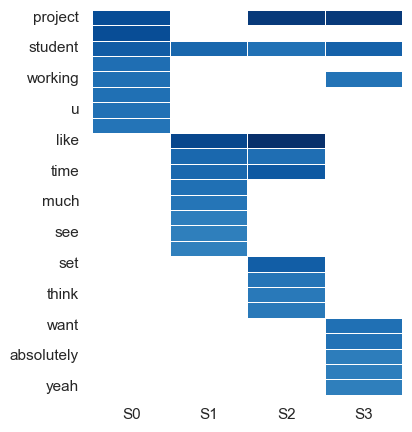

In [28]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.022*"student" + 0.020*"know" + 0.020*"skill" + 0.018*"project" + '
  '0.017*"working" + 0.017*"master" + 0.016*"design" + 0.016*"task" + '
  '0.013*"u" + 0.013*"arend"'),
 (1,
  '0.050*"skill" + 0.025*"like" + 0.019*"experience" + 0.016*"time" + '
  '0.016*"much" + 0.014*"see" + 0.014*"student" + 0.013*"structure" + '
  '0.013*"thing" + 0.012*"well"'),
 (2,
  '0.030*"skill" + 0.024*"like" + 0.019*"time" + 0.019*"set" + 0.016*"project" '
  '+ 0.013*"student" + 0.012*"thing" + 0.011*"think" + 0.011*"certain" + '
  '0.010*"mean"'),
 (3,
  '0.025*"project" + 0.022*"work" + 0.015*"skill" + 0.014*"want" + '
  '0.013*"student" + 0.012*"okay" + 0.012*"year" + 0.011*"done" + 0.011*"yeah" '
  '+ 0.011*"choose"'),
 (4,
  '0.030*"skill" + 0.024*"project" + 0.019*"like" + 0.015*"help" + '
  '0.014*"part" + 0.014*"good" + 0.013*"quicker" + 0.013*"knew" + '
  '0.013*"everyone" + 0.012*"go"')]

Perplexity:  -6.300688999714314

Coherence Score:  0.42566137886768496
(36, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.080606 -0.005011       1        1  29.988507
1     -0.050700 -0.049889       2        1  20.798904
4     -0.043110  0.040235       3        1  20.360857
3      0.061745  0.002910       4        1  19.755360
2     -0.048540  0.011756       5        1   9.096372, topic_info=           Term       Freq      Total Category  logprob  loglift
24         like   7.000000   7.000000  Default  30.0000  30.0000
8         skill  15.000000  15.000000  Default  29.0000  29.0000
6       project   9.000000   9.000000  Default  28.0000  28.0000
249  experience   3.000000   3.000000  Default  27.0000  27.0000
55         help   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
56         knew   0.358243   3.173048   Topic5  -4.9500   0.2161
72            u   0.357510   4.766619   Topic5  -4.9521  -0.1929
47         team   0.346788   4.046507   Topic5  -4.9825  -0.0596
23         know   0.342544   5.767922   Topic5  -4.9948  -0.4264
133         got   0.334939   2.460460   Topic5  -5.0173   0.4031

[268 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
173       1  0.379148  absolutely
173       4  0.379148  absolutely
176       1  0.351608      almost
176       4  0.351608      almost
177       1  0.352266      always
...     ...       ...         ...
33        1  0.510671        yeah
33        3  0.255336        yeah
33        4  0.255336        yeah
126       1  0.385385        year
126       4  0.385385        year

[253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3])

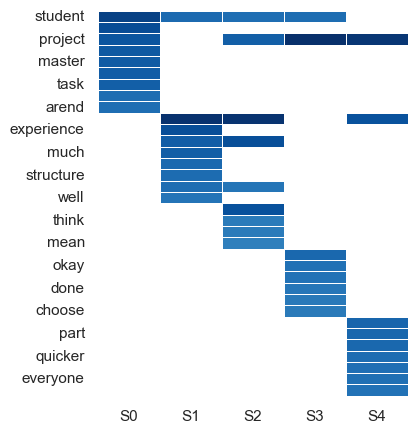

In [29]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 6'

In [30]:
i_stage = 'Sheet 6'

[(0,
  '0.020*"know" + 0.020*"team" + 0.019*"year" + 0.018*"think" + 0.018*"well" + '
  '0.016*"project" + 0.013*"really" + 0.012*"kind" + 0.011*"final" + '
  '0.011*"thing"'),
 (1,
  '0.026*"think" + 0.023*"like" + 0.017*"obstacle" + 0.011*"kind" + '
  '0.011*"know" + 0.010*"well" + 0.010*"thing" + 0.009*"guy" + 0.009*"time" + '
  '0.009*"test"'),
 (2,
  '0.030*"think" + 0.016*"obstacle" + 0.014*"well" + 0.013*"like" + '
  '0.013*"team" + 0.013*"know" + 0.012*"thing" + 0.011*"quite" + '
  '0.010*"project" + 0.008*"year"')]

Perplexity:  -6.187995910717666

Coherence Score:  0.35542296439763676
(16, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.028732 -0.003119       1        1  34.763157
1      0.021198 -0.008279       2        1  33.675134
2      0.007534  0.011398       3        1  31.561710, topic_info=         Term       Freq      Total Category  logprob  loglift
9        team  10.000000  10.000000  Default  30.0000  30.0000
53       like  11.000000  11.000000  Default  29.0000  29.0000
4    obstacle   9.000000   9.000000  Default  28.0000  28.0000
48       year   9.000000   9.000000  Default  27.0000  27.0000
35      final   5.000000   5.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
21         go   1.535001   5.480158   Topic3  -5.1214  -0.1194
65        day   1.376670   4.214579   Topic3  -5.2303   0.0343
339     issue   1.367660   4.188917   Topic3  -5.2369   0.0339
188   working   1.355748   4.210393   Topic3  -5.2456   0.0200
121      time   1.423483   6.282770   Topic3  -5.1969  -0.3315

[205 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.247558      able
0         2  0.247558      able
0         3  0.495117      able
126       1  0.238005  actually
126       2  0.476010  actually
...     ...       ...       ...
188       3  0.237508   working
48        1  0.536513      year
48        2  0.214605      year
48        3  0.214605      year
369       1  0.749198       yet

[269 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

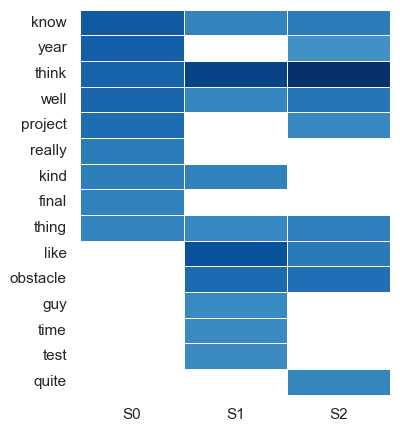

In [31]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.021*"know" + 0.021*"team" + 0.018*"year" + 0.018*"think" + 0.016*"well" + '
  '0.015*"project" + 0.013*"kind" + 0.013*"really" + 0.011*"figure" + '
  '0.011*"final"'),
 (1,
  '0.029*"like" + 0.026*"think" + 0.015*"obstacle" + 0.012*"guy" + '
  '0.012*"help" + 0.011*"time" + 0.011*"test" + 0.010*"always" + 0.009*"know" '
  '+ 0.009*"going"'),
 (2,
  '0.030*"think" + 0.015*"know" + 0.013*"like" + 0.011*"obstacle" + '
  '0.011*"well" + 0.009*"general" + 0.009*"quite" + 0.009*"team" + 0.008*"guy" '
  '+ 0.008*"remember"'),
 (3,
  '0.026*"think" + 0.022*"well" + 0.019*"obstacle" + 0.018*"team" + '
  '0.018*"thing" + 0.018*"project" + 0.014*"year" + 0.013*"know" + '
  '0.012*"quite" + 0.012*"really"')]

Perplexity:  -6.3022357444090344

Coherence Score:  0.32039965314025326
(22, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.027583  0.024361       1        1  37.604938
2     -0.010976  0.019819       2        1  24.722102
1     -0.039963 -0.009119       3        1  20.257425
3      0.023355 -0.035061       4        1  17.415535, topic_info=          Term       Freq      Total Category  logprob  loglift
53        like  10.000000  10.000000  Default  30.0000  30.0000
4     obstacle   8.000000   8.000000  Default  29.0000  29.0000
9         team  11.000000  11.000000  Default  28.0000  28.0000
11       think  19.000000  19.000000  Default  27.0000  27.0000
1    adaptable   3.000000   3.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
362        uav   0.637651   1.895837   Topic4  -5.4053   0.6582
66   direction   0.680597   2.666414   Topic4  -5.3402   0.3823
70      flight   0.718610   3.588129   Topic4  -5.2858   0.1397
28        test   0.779877   6.347547   Topic4  -5.2040  -0.3489
144     figure   0.736369   6.477454   Topic4  -5.2614  -0.4265

[260 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.243422      able
0         2  0.243422      able
0         4  0.243422      able
126       1  0.470463  actually
126       2  0.235231  actually
...     ...       ...       ...
48        1  0.606406      year
48        2  0.101068      year
48        3  0.101068      year
48        4  0.202135      year
369       1  0.668135       yet

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

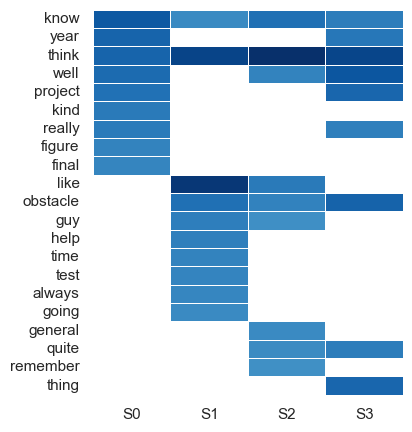

In [32]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.022*"team" + 0.022*"know" + 0.021*"year" + 0.018*"project" + 0.017*"well" '
  '+ 0.017*"think" + 0.015*"really" + 0.013*"final" + 0.012*"kind" + '
  '0.011*"thing"'),
 (1,
  '0.026*"think" + 0.026*"like" + 0.016*"kind" + 0.013*"figure" + 0.012*"help" '
  '+ 0.012*"guy" + 0.012*"obstacle" + 0.011*"test" + 0.010*"time" + '
  '0.009*"always"'),
 (2,
  '0.035*"think" + 0.023*"obstacle" + 0.018*"like" + 0.016*"know" + '
  '0.010*"well" + 0.010*"really" + 0.009*"guy" + 0.009*"general" + '
  '0.009*"project" + 0.008*"quite"'),
 (3,
  '0.022*"well" + 0.022*"think" + 0.017*"team" + 0.017*"project" + '
  '0.016*"year" + 0.016*"thing" + 0.015*"know" + 0.014*"work" + 0.011*"kind" + '
  '0.011*"quite"'),
 (4,
  '0.024*"think" + 0.016*"thing" + 0.015*"team" + 0.015*"adaptable" + '
  '0.014*"well" + 0.014*"like" + 0.014*"quite" + 0.011*"obstacle" + '
  '0.010*"fairly" + 0.010*"know"')]

Perplexity:  -6.4827732426988565

Coherence Score:  0.30479733409059684
(23, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058884 -0.016261       1        1  29.551268
2     -0.010360 -0.010325       2        1  27.217818
1     -0.036749 -0.030061       3        1  25.243356
4     -0.030317  0.026699       4        1   9.669191
3      0.018542  0.029948       5        1   8.318366, topic_info=           Term       Freq      Total Category  logprob  loglift
9          team   9.000000   9.000000  Default  30.0000  30.0000
46         well  10.000000  10.000000  Default  29.0000  29.0000
10        thing   7.000000   7.000000  Default  28.0000  28.0000
1     adaptable   3.000000   3.000000  Default  27.0000  27.0000
11        think  20.000000  20.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
4      obstacle   0.511063  10.257787   Topic5  -4.8877  -0.5126
201  experience   0.386117   4.033574   Topic5  -5.1681   0.1404
67         done   0.375573   4.918992   Topic5  -5.1958  -0.0857
121        time   0.368537   6.651619   Topic5  -5.2147  -0.4064
144      figure   0.368690   6.923349   Topic5  -5.2143  -0.4460

[308 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.252876      able
0         2  0.252876      able
0         3  0.252876      able
0         4  0.252876      able
126       1  0.213324  actually
...     ...       ...       ...
48        1  0.541322      year
48        2  0.108264      year
48        3  0.108264      year
48        5  0.108264      year
369       1  0.695274       yet

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

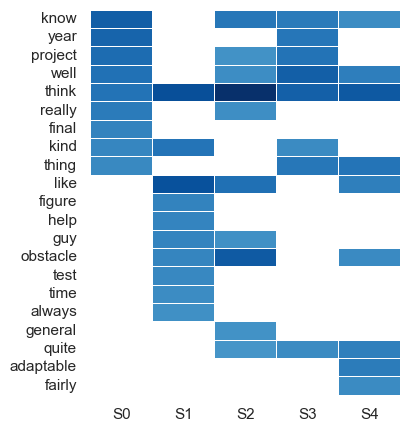

In [33]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 7'

In [34]:
i_stage = 'Sheet 7'

[(0,
  '0.033*"like" + 0.026*"think" + 0.015*"positive" + 0.015*"want" + '
  '0.015*"work" + 0.014*"actually" + 0.013*"working" + 0.012*"mpy" + '
  '0.012*"general" + 0.012*"time"'),
 (1,
  '0.015*"think" + 0.014*"really" + 0.014*"mpy" + 0.014*"know" + '
  '0.013*"everyone" + 0.011*"well" + 0.010*"want" + 0.010*"quite" + '
  '0.010*"work" + 0.010*"positive"'),
 (2,
  '0.024*"team" + 0.022*"everyone" + 0.016*"work" + 0.015*"positive" + '
  '0.015*"working" + 0.014*"think" + 0.013*"know" + 0.013*"everybody" + '
  '0.012*"project" + 0.012*"student"')]

Perplexity:  -5.947311939375879

Coherence Score:  0.3173270927102197
(19, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.003288 -0.018148       1        1  47.953193
0     -0.038462  0.010190       2        1  30.914369
2      0.041750  0.007958       3        1  21.132438, topic_info=          Term      Freq     Total Category  logprob  loglift
89        like  7.000000  7.000000  Default  30.0000  30.0000
61        team  6.000000  6.000000  Default  29.0000  29.0000
102  everybody  2.000000  2.000000  Default  28.0000  28.0000
6     everyone  6.000000  6.000000  Default  27.0000  27.0000
104    working  4.000000  4.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
62        time  0.782996  4.474146   Topic3  -4.8744  -0.1886
19      really  0.731285  5.108538   Topic3  -4.9427  -0.3895
47          le  0.633255  1.933553   Topic3  -5.0867   0.4381
99        want  0.675623  5.253294   Topic3  -5.0219  -0.4966
151       load  0.636207  2.863654   Topic3  -5.0820   0.0500

[193 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
243       1  0.644370  absolutely
128       1  0.677766    academic
128       3  0.338883    academic
105       2  0.807307     achieve
106       1  0.431149    actually
...     ...       ...         ...
104       1  0.223879     working
104       2  0.447758     working
104       3  0.447758     working
100       2  0.806689    workload
177       1  0.461237        year

[202 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

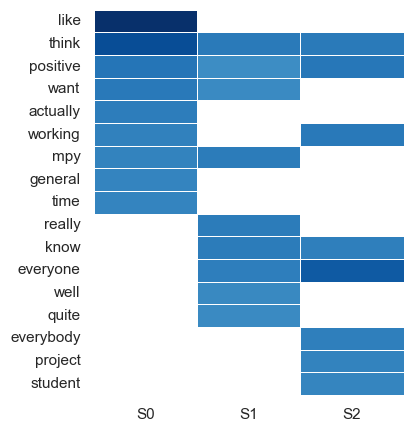

In [35]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.036*"like" + 0.027*"think" + 0.021*"work" + 0.021*"positive" + '
  '0.018*"working" + 0.015*"want" + 0.014*"general" + 0.014*"mpy" + '
  '0.014*"actually" + 0.013*"time"'),
 (1,
  '0.017*"everyone" + 0.016*"think" + 0.014*"positive" + 0.014*"quite" + '
  '0.013*"really" + 0.013*"remember" + 0.013*"mpy" + 0.012*"work" + '
  '0.012*"know" + 0.010*"negative"'),
 (2,
  '0.027*"team" + 0.022*"everyone" + 0.015*"working" + 0.014*"everybody" + '
  '0.014*"student" + 0.013*"project" + 0.012*"part" + 0.012*"think" + '
  '0.012*"positive" + 0.012*"know"'),
 (3,
  '0.016*"know" + 0.014*"think" + 0.014*"really" + 0.014*"needed" + '
  '0.013*"team" + 0.011*"mpy" + 0.010*"want" + 0.010*"student" + 0.009*"time" '
  '+ 0.009*"enjoyed"')]

Perplexity:  -6.214599098461434

Coherence Score:  0.322213637958798
(23, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.067290  0.005538       1        1  36.655299
3     -0.047979 -0.014638       2        1  27.595517
1      0.008036 -0.023348       3        1  27.585783
2     -0.027346  0.032448       4        1   8.163401, topic_info=          Term      Freq     Total Category  logprob  loglift
61        team  6.000000  6.000000  Default  30.0000  30.0000
104    working  4.000000  4.000000  Default  29.0000  29.0000
89        like  8.000000  8.000000  Default  28.0000  28.0000
6     everyone  6.000000  6.000000  Default  27.0000  27.0000
102  everybody  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
151       load  0.272026  2.619218   Topic4  -4.9805   0.2408
176       well  0.309879  3.963232   Topic4  -4.8502  -0.0431
20    remember  0.279204  3.208179   Topic4  -4.9545   0.0640
128   academic  0.261016  2.624644   Topic4  -5.0218   0.1974
99        want  0.263585  5.409667   Topic4  -5.0120  -0.5161

[236 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
243       3  0.707793  absolutely
128       2  0.381004    academic
128       3  0.381004    academic
105       1  0.756253     achieve
106       1  0.412322    actually
...     ...       ...         ...
242       3  0.675602      within
26        1  0.632611        work
26        3  0.316306        work
104       1  0.663590     working
104       4  0.221197     working

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

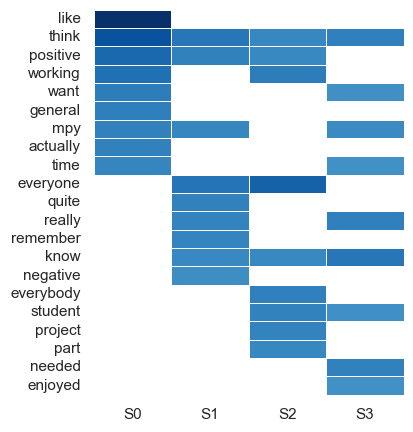

In [36]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.037*"like" + 0.028*"think" + 0.021*"positive" + 0.019*"working" + '
  '0.018*"work" + 0.017*"general" + 0.014*"time" + 0.014*"want" + 0.014*"team" '
  '+ 0.012*"kind"'),
 (1,
  '0.022*"quite" + 0.021*"everyone" + 0.021*"positive" + 0.021*"remember" + '
  '0.018*"think" + 0.018*"really" + 0.017*"work" + 0.014*"together" + '
  '0.013*"negative" + 0.012*"see"'),
 (2,
  '0.028*"working" + 0.021*"everybody" + 0.021*"towards" + 0.019*"positive" + '
  '0.016*"everyone" + 0.012*"project" + 0.012*"needed" + 0.012*"remember" + '
  '0.011*"everything" + 0.011*"team"'),
 (3,
  '0.018*"needed" + 0.017*"know" + 0.016*"team" + 0.014*"really" + '
  '0.014*"think" + 0.012*"time" + 0.012*"hour" + 0.011*"come" + '
  '0.010*"enjoyed" + 0.010*"around"'),
 (4,
  '0.022*"team" + 0.022*"mpy" + 0.021*"everyone" + 0.017*"want" + 0.017*"know" '
  '+ 0.016*"work" + 0.016*"think" + 0.016*"like" + 0.015*"student" + '
  '0.015*"part"')]

Perplexity:  -6.09488351530094

Coherence Score:  0.41362132771381466

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.080880  0.043567       1        1  30.542823
4     -0.030347 -0.086038       2        1  27.762020
3      0.064600  0.004959       3        1  26.668075
1      0.014606  0.034961       4        1  11.812115
2      0.032022  0.002550       5        1   3.214966, topic_info=          Term      Freq     Total Category  logprob  loglift
104    working  4.000000  4.000000  Default  30.0000  30.0000
17    positive  5.000000  5.000000  Default  29.0000  29.0000
77     towards  1.000000  1.000000  Default  28.0000  28.0000
6     everyone  6.000000  6.000000  Default  27.0000  27.0000
102  everybody  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
62        time  0.133358  4.768812   Topic5  -4.7615  -0.1395
46        know  0.141160  6.301022   Topic5  -4.7047  -0.3612
23       think  0.155291  9.357556   Topic5  -4.6092  -0.6613
176       well  0.102866  3.970542   Topic5  -5.0211  -0.2159
47          le  0.097392  2.022104   Topic5  -5.0758   0.4042

[272 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
243       4  0.923348  absolutely
128       2  0.735736    academic
106       1  0.402987    actually
106       2  0.201494    actually
106       3  0.201494    actually
...     ...       ...         ...
104       1  0.721516     working
100       1  0.766499    workload
230       1  0.488743    workshop
230       3  0.488743    workshop
177       2  0.495525        year

[225 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

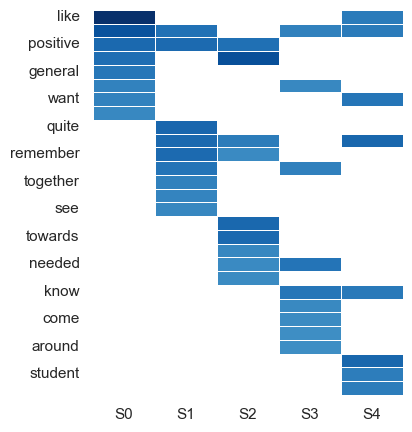

In [37]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 8'

In [38]:
i_stage = 'Sheet 8'

[(0,
  '0.030*"like" + 0.028*"team" + 0.025*"think" + 0.016*"project" + '
  '0.015*"yeah" + 0.014*"praise" + 0.010*"say" + 0.010*"formally" + '
  '0.010*"member" + 0.010*"anything"'),
 (1,
  '0.037*"think" + 0.024*"team" + 0.014*"good" + 0.014*"know" + 0.013*"praise" '
  '+ 0.013*"level" + 0.013*"done" + 0.011*"among" + 0.010*"implemented" + '
  '0.010*"working"'),
 (2,
  '0.020*"like" + 0.019*"think" + 0.015*"team" + 0.014*"praise" + 0.012*"know" '
  '+ 0.011*"project" + 0.010*"least" + 0.010*"comment" + 0.010*"obviously" + '
  '0.010*"done"')]

Perplexity:  -5.992250944659548

Coherence Score:  0.31665864842017816
(20, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.031221 -0.009034       1        1  41.909183
2     -0.025969 -0.015904       2        1  35.207762
0     -0.005252  0.024938       3        1  22.883055, topic_info=           Term      Freq     Total Category  logprob  loglift
37         like  7.000000  7.000000  Default  30.0000  30.0000
45         yeah  3.000000  3.000000  Default  29.0000  29.0000
56      project  3.000000  3.000000  Default  28.0000  28.0000
58         team  8.000000  8.000000  Default  27.0000  27.0000
189    anything  2.000000  2.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
23           dr  0.586852  2.485295   Topic3  -5.0792   0.0314
11         know  0.599007  4.699104   Topic3  -5.0587  -0.5851
127  individual  0.557186  2.509659   Topic3  -5.1311  -0.0302
27        smith  0.548252  2.516917   Topic3  -5.1473  -0.0493
100     student  0.536745  1.784682   Topic3  -5.1685   0.2733

[184 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
167       1  0.779809  achievement
46        2  0.788465       across
168       1  0.773363        among
60        1  0.504613      another
60        2  0.504613      another
...     ...       ...          ...
21        1  0.746609      working
21        2  0.373304      working
45        1  0.306293         yeah
45        2  0.306293         yeah
45        3  0.306293         yeah

[179 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

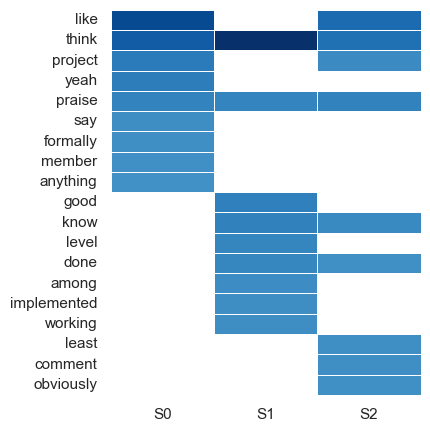

In [39]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.036*"like" + 0.029*"think" + 0.024*"team" + 0.021*"yeah" + '
  '0.019*"project" + 0.015*"formally" + 0.013*"anything" + 0.013*"thing" + '
  '0.013*"praise" + 0.013*"say"'),
 (1,
  '0.037*"think" + 0.030*"team" + 0.020*"good" + 0.017*"level" + '
  '0.016*"praise" + 0.016*"know" + 0.015*"done" + 0.013*"job" + 0.012*"among" '
  '+ 0.012*"like"'),
 (2,
  '0.025*"think" + 0.021*"like" + 0.015*"praise" + 0.014*"team" + 0.013*"know" '
  '+ 0.012*"others" + 0.011*"obviously" + 0.011*"contribution" + '
  '0.011*"project" + 0.011*"least"'),
 (3,
  '0.020*"team" + 0.010*"think" + 0.009*"uav" + 0.009*"praise" + 0.008*"least" '
  '+ 0.008*"arend" + 0.008*"side" + 0.008*"implemented" + 0.008*"point" + '
  '0.008*"another"')]

Perplexity:  -6.055117755838968

Coherence Score:  0.33325102142466306
(26, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.058330 -0.014362       1        1  44.235185
2     -0.054691 -0.024568       2        1  35.010203
0     -0.006846  0.062743       3        1  19.982968
3      0.003207 -0.023812       4        1   0.771645, topic_info=        Term      Freq     Total Category  logprob  loglift
58      team  9.000000  9.000000  Default  30.0000  30.0000
37      like  8.000000  8.000000  Default  29.0000  29.0000
104      uav  2.000000  2.000000  Default  28.0000  28.0000
64     arend  2.000000  2.000000  Default  27.0000  27.0000
54     least  2.000000  2.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
23        dr  0.018618  2.687389   Topic4  -5.1403  -0.1078
56   project  0.019713  4.182081   Topic4  -5.0831  -0.4929
11      know  0.018732  5.177468   Topic4  -5.1342  -0.7574
106     went  0.017545  2.327112   Topic4  -5.1996  -0.0232
43   someone  0.017665  2.658496   Topic4  -5.1928  -0.1495

[245 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
59        1  0.868873     accepted
228       2  0.876018  accordingly
46        2  0.830433       across
29        2  0.725187       always
168       1  0.730434        among
...     ...       ...          ...
247       2  0.862992      worried
45        1  0.283116         yeah
45        2  0.283116         yeah
45        3  0.566231         yeah
166       2  0.557315         zone

[211 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

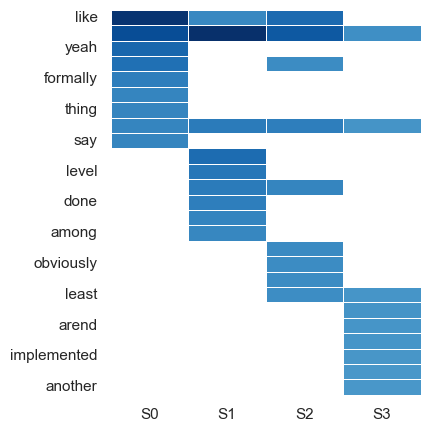

In [40]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.038*"like" + 0.032*"team" + 0.027*"yeah" + 0.026*"project" + '
  '0.018*"anything" + 0.018*"member" + 0.017*"praise" + 0.016*"think" + '
  '0.016*"research" + 0.016*"completing"'),
 (1,
  '0.028*"team" + 0.016*"among" + 0.014*"think" + 0.013*"praise" + '
  '0.011*"individual" + 0.009*"implemented" + 0.008*"arend" + 0.008*"captain" '
  '+ 0.008*"uav" + 0.008*"someone"'),
 (2,
  '0.022*"like" + 0.019*"think" + 0.018*"others" + 0.017*"obviously" + '
  '0.012*"praise" + 0.011*"anyone" + 0.011*"appreciated" + '
  '0.010*"contribution" + 0.010*"either" + 0.010*"someone"'),
 (3,
  '0.009*"team" + 0.007*"moment" + 0.007*"listened" + 0.007*"progress" + '
  '0.007*"meeting" + 0.007*"matter" + 0.007*"track" + 0.007*"everyone" + '
  '0.007*"pointed" + 0.007*"raise"'),
 (4,
  '0.044*"think" + 0.026*"team" + 0.020*"like" + 0.019*"good" + 0.018*"know" + '
  '0.015*"praise" + 0.013*"informally" + 0.013*"level" + 0.013*"done" + '
  '0.012*"really"')]

Perplexity:  -6.166286454472727

Coherenc

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.070367  0.034639       1        1  52.489357
2      0.013920 -0.065680       2        1  20.772880
0      0.061997  0.053216       3        1  17.748427
1     -0.004129 -0.007730       4        1   8.381921
3     -0.001422 -0.014445       5        1   0.607414, topic_info=           Term      Freq     Total Category  logprob  loglift
58         team  9.000000  9.000000  Default  30.0000  30.0000
37         like  9.000000  9.000000  Default  29.0000  29.0000
45         yeah  3.000000  3.000000  Default  28.0000  28.0000
56      project  4.000000  4.000000  Default  27.0000  27.0000
216      member  2.000000  2.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
127  individual  0.016026  2.375636   Topic5  -5.0508   0.1049
27        smith  0.016267  2.565892   Topic5  -5.0359   0.0428
23           dr  0.015467  2.571487   Topic5  -5.0864  -0.0098
58         team  0.021308  9.624800   Topic5  -4.7660  -1.0093
15       praise  0.015956  5.899402   Topic5  -5.0552  -0.8091

[251 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
59        1  0.864814     accepted
167       1  0.906397  achievement
140       1  0.774739  acknowledge
29        2  0.808357       always
168       1  0.429466        among
...     ...       ...          ...
247       2  0.963842      worried
45        1  0.264370         yeah
45        2  0.264370         yeah
45        3  0.528740         yeah
166       1  0.968364         zone

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 2, 4])

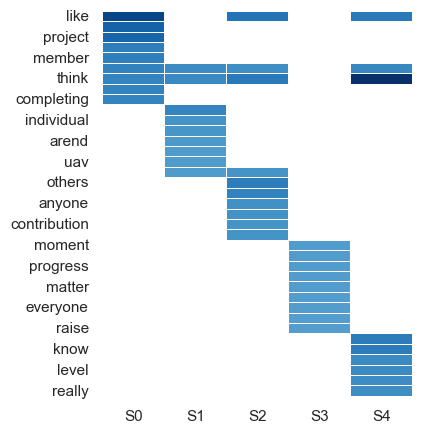

In [41]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 9'

In [42]:
i_stage = 'Sheet 9'

[(0,
  '0.020*"work" + 0.020*"like" + 0.013*"think" + 0.012*"really" + 0.012*"know" '
  '+ 0.011*"thing" + 0.009*"project" + 0.009*"done" + 0.009*"time" + '
  '0.008*"mean"'),
 (1,
  '0.017*"think" + 0.015*"know" + 0.015*"work" + 0.014*"like" + '
  '0.013*"lelanie" + 0.012*"working" + 0.012*"feedback" + 0.011*"criticism" + '
  '0.011*"well" + 0.011*"thing"'),
 (2,
  '0.016*"like" + 0.014*"really" + 0.014*"know" + 0.014*"project" + '
  '0.012*"meeting" + 0.011*"thing" + 0.010*"think" + 0.009*"mean" + '
  '0.009*"person" + 0.008*"go"')]

Perplexity:  -6.274716960807001

Coherence Score:  0.26355742737473503
(18, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.010526  0.016656       1        1  37.706736
2     -0.025526 -0.001839       2        1  32.353366
0      0.015000 -0.014817       3        1  29.939898, topic_info=        Term      Freq     Total Category  logprob  loglift
83       bit  2.000000  2.000000  Default  30.0000  30.0000
80      work  9.000000  9.000000  Default  29.0000  29.0000
89   lacking  1.000000  1.000000  Default  28.0000  28.0000
50     group  2.000000  2.000000  Default  27.0000  27.0000
84      face  1.000000  1.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
85  feedback  1.561401  5.971666   Topic3  -4.8735  -0.1355
41    design  1.262866  3.934313   Topic3  -5.0857   0.0696
59   meeting  1.381091  5.358618   Topic3  -4.9962  -0.1499
27      well  1.248265  5.345751   Topic3  -5.0973  -0.2486
49        go  1.192165  4.678418   Topic3  -5.1433  -0.1612

[203 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
268       1  0.743359  accommodating
153       1  0.394156       actually
153       2  0.394156       actually
153       3  0.394156       actually
154       3  0.805106          agree
...     ...       ...            ...
152       2  0.168180        working
152       3  0.336360        working
106       1  0.432840           yeah
106       2  0.432840           yeah
106       3  0.216420           yeah

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

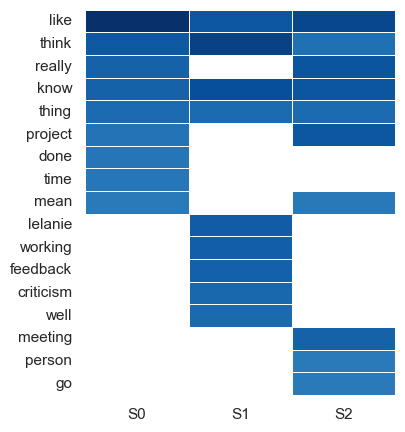

In [43]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.025*"work" + 0.021*"like" + 0.012*"project" + 0.012*"think" + '
  '0.011*"really" + 0.011*"bit" + 0.011*"know" + 0.010*"time" + 0.010*"thing" '
  '+ 0.010*"done"'),
 (1,
  '0.025*"think" + 0.017*"work" + 0.016*"working" + 0.014*"well" + '
  '0.014*"thing" + 0.013*"everyone" + 0.012*"yeah" + 0.012*"project" + '
  '0.012*"like" + 0.011*"quite"'),
 (2,
  '0.016*"like" + 0.016*"project" + 0.014*"really" + 0.012*"meeting" + '
  '0.011*"thing" + 0.010*"think" + 0.010*"person" + 0.009*"know" + '
  '0.009*"yeah" + 0.009*"work"'),
 (3,
  '0.028*"know" + 0.019*"lelanie" + 0.016*"like" + 0.014*"criticism" + '
  '0.013*"really" + 0.013*"informal" + 0.011*"said" + 0.010*"go" + '
  '0.010*"meeting" + 0.010*"feedback"')]

Perplexity:  -6.353800451912838

Coherence Score:  0.2760692387984969
(23, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.008422 -0.003739       1        1  30.025847
1     -0.031406  0.028692       2        1  27.771960
0     -0.044460 -0.023373       3        1  25.884850
3      0.067445 -0.001580       4        1  16.317343, topic_info=          Term      Freq     Total Category  logprob  loglift
88        know  8.000000  8.000000  Default  30.0000  30.0000
139    lelanie  4.000000  4.000000  Default  29.0000  29.0000
4    criticism  4.000000  4.000000  Default  28.0000  28.0000
83         bit  2.000000  2.000000  Default  27.0000  27.0000
297     moment  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
43      discus  0.601805  3.361917   Topic4  -5.2199   0.0926
121    student  0.606200  4.550777   Topic4  -5.2126  -0.2029
151      whole  0.600007  3.334744   Topic4  -5.2229   0.0977
122  typically  0.599108  3.409841   Topic4  -5.2244   0.0740
125      arend  0.594885  2.496124   Topic4  -5.2315   0.3788

[248 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
153       1  0.392534  actually
153       2  0.392534  actually
153       3  0.392534  actually
154       3  0.799487     agree
0         2  0.485950    anyone
...     ...       ...       ...
302       4  0.838566  workshop
303       4  0.843921        ya
106       1  0.396902      yeah
106       2  0.396902      yeah
106       3  0.198451      yeah

[293 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

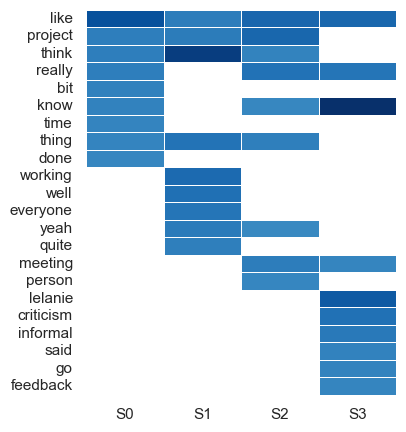

In [44]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.028*"work" + 0.021*"like" + 0.012*"bit" + 0.012*"time" + 0.011*"really" + '
  '0.011*"know" + 0.011*"done" + 0.011*"project" + 0.011*"lot" + '
  '0.010*"student"'),
 (1,
  '0.031*"think" + 0.018*"working" + 0.017*"well" + 0.017*"work" + '
  '0.016*"project" + 0.015*"everyone" + 0.014*"yeah" + 0.014*"quite" + '
  '0.014*"thing" + 0.013*"criticism"'),
 (2,
  '0.020*"project" + 0.016*"meeting" + 0.014*"like" + 0.014*"really" + '
  '0.011*"thing" + 0.011*"yeah" + 0.010*"person" + 0.009*"go" + 0.009*"work" + '
  '0.009*"basically"'),
 (3,
  '0.026*"lelanie" + 0.024*"know" + 0.019*"criticism" + 0.013*"feedback" + '
  '0.013*"regard" + 0.012*"go" + 0.011*"informal" + 0.011*"like" + '
  '0.011*"meeting" + 0.011*"refer"'),
 (4,
  '0.025*"like" + 0.021*"know" + 0.015*"really" + 0.013*"think" + '
  '0.012*"typically" + 0.012*"manufacture" + 0.011*"thing" + 0.011*"well" + '
  '0.011*"informal" + 0.011*"mean"')]

Perplexity:  -6.397469037963498

Coherence Score:  0.3863756985957366
(30, 1

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.056796  0.048129       1        1  27.832327
0      0.056391 -0.047357       2        1  25.778165
2      0.001076 -0.008526       3        1  22.704143
4     -0.034141  0.012342       4        1  16.545297
3     -0.080121 -0.004588       5        1   7.140067, topic_info=          Term      Freq      Total Category  logprob  loglift
139    lelanie  4.000000   4.000000  Default  30.0000  30.0000
4    criticism  4.000000   4.000000  Default  29.0000  29.0000
88        know  8.000000   8.000000  Default  28.0000  28.0000
140     regard  3.000000   3.000000  Default  27.0000  27.0000
258       said  1.000000   1.000000  Default  26.0000  26.0000
..         ...       ...        ...      ...      ...      ...
57        like  0.543341  10.904304   Topic5  -4.4956  -0.3597
67      really  0.502357   7.842772   Topic5  -4.5740  -0.1086
125      arend  0.357131   2.462087   Topic5  -4.9152   0.7088
151      whole  0.348765   3.241433   Topic5  -4.9389   0.4101
121    student  0.348187   4.697207   Topic5  -4.9406   0.0375

[278 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
153       2  0.386342  actually
153       4  0.386342  actually
154       2  0.749023     agree
0         1  0.884552    anyone
124       1  0.460902  anything
...     ...       ...       ...
152       2  0.150549   working
152       3  0.150549   working
152       4  0.150549   working
106       1  0.559690      yeah
106       3  0.373126      yeah

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 5, 4])

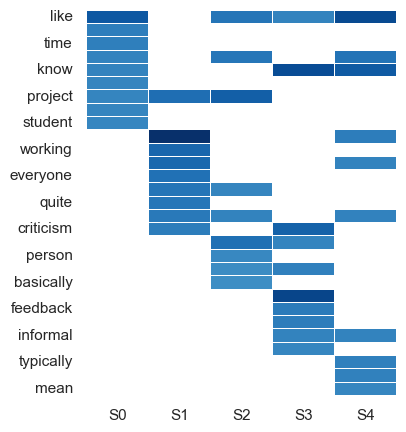

In [45]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 10'

In [46]:
i_stage = 'Sheet 10'

[(0,
  '0.026*"communication" + 0.019*"know" + 0.014*"think" + 0.014*"group" + '
  '0.012*"whatsapp" + 0.012*"like" + 0.010*"yeah" + 0.009*"kind" + '
  '0.009*"problem" + 0.009*"okay"'),
 (1,
  '0.023*"think" + 0.018*"like" + 0.016*"problem" + 0.016*"good" + '
  '0.015*"whatsapp" + 0.015*"communication" + 0.013*"know" + 0.012*"group" + '
  '0.012*"kind" + 0.010*"really"'),
 (2,
  '0.024*"know" + 0.022*"think" + 0.012*"communication" + 0.012*"project" + '
  '0.011*"communicate" + 0.010*"good" + 0.010*"else" + 0.010*"say" + '
  '0.009*"bit" + 0.009*"yeah"')]

Perplexity:  -6.15238135526093

Coherence Score:  0.3217978120454431
(17, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.031066  0.002751       1        1  40.718693
1      0.011668 -0.017955       2        1  30.930413
0      0.019399  0.015204       3        1  28.350894, topic_info=              Term       Freq      Total Category  logprob  loglift
96         problem   5.000000   5.000000  Default  30.0000  30.0000
103          group   6.000000   6.000000  Default  29.0000  29.0000
9    communication  11.000000  11.000000  Default  28.0000  28.0000
43        whatsapp   6.000000   6.000000  Default  27.0000  27.0000
93            kind   4.000000   4.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
81            work   1.168599   4.764291   Topic3  -5.0698  -0.1448
87        actually   1.144190   4.586483   Topic3  -5.0910  -0.1279
151        project   1.216962   6.180400   Topic3  -5.0293  -0.3645
85        informal   1.015007   3.682909   Topic3  -5.2108  -0.0283
55        everyone   1.004295   3.462388   Topic3  -5.2214   0.0228

[195 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
200       3  0.782490   achieve
87        1  0.436064  actually
87        2  0.436064  actually
87        3  0.218032  actually
88        2  0.821326  adequate
...     ...       ...       ...
82        2  0.202740      yeah
82        3  0.405479      yeah
168       1  0.312524      year
168       2  0.312524      year
168       3  0.312524      year

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

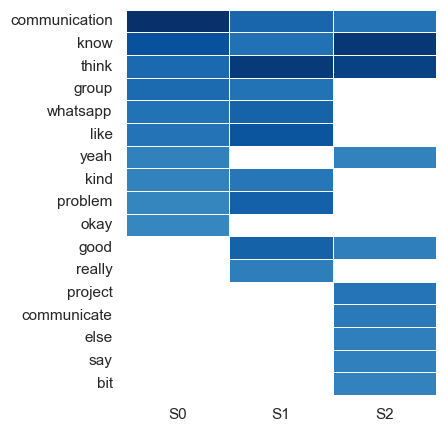

In [47]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.025*"communication" + 0.022*"know" + 0.019*"yeah" + 0.017*"informal" + '
  '0.014*"style" + 0.012*"think" + 0.011*"say" + 0.009*"sort" + 0.008*"bit" + '
  '0.008*"idea"'),
 (1,
  '0.018*"think" + 0.013*"like" + 0.013*"really" + 0.011*"good" + '
  '0.011*"problem" + 0.011*"year" + 0.011*"said" + 0.010*"well" + 0.009*"kind" '
  '+ 0.009*"going"'),
 (2,
  '0.018*"know" + 0.015*"think" + 0.013*"project" + 0.011*"else" + '
  '0.011*"communicate" + 0.011*"someone" + 0.010*"communication" + '
  '0.010*"time" + 0.009*"say" + 0.009*"research"'),
 (3,
  '0.029*"think" + 0.023*"communication" + 0.023*"whatsapp" + 0.022*"know" + '
  '0.020*"like" + 0.019*"group" + 0.016*"good" + 0.013*"problem" + '
  '0.011*"okay" + 0.011*"kind"')]

Perplexity:  -6.234337765541746

Coherence Score:  0.35694060415908563
(28, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.045450 -0.024354       1        1  49.542828
2     -0.003800  0.014950       2        1  28.186231
0     -0.045501 -0.022846       3        1  13.277635
1      0.003851  0.032249       4        1   8.993306, topic_info=              Term       Freq      Total Category  logprob  loglift
85        informal   2.000000   2.000000  Default  30.0000  30.0000
82            yeah   4.000000   4.000000  Default  29.0000  29.0000
9    communication  11.000000  11.000000  Default  28.0000  28.0000
96         problem   5.000000   5.000000  Default  27.0000  27.0000
113          style   2.000000   2.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
9    communication   0.465022  11.922729   Topic4  -4.8431  -0.8354
163           team   0.375446   4.132854   Topic4  -5.0571   0.0101
12            done   0.362439   3.454033   Topic4  -5.0924   0.1542
121          thing   0.368556   4.204303   Topic4  -5.0756  -0.0256
2         anything   0.337981   4.330159   Topic4  -5.1622  -0.1417

[232 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
87        1  0.635456  actually
87        2  0.211819  actually
87        4  0.211819  actually
171       1  0.460826    always
172       1  0.694367    answer
...     ...       ...       ...
82        2  0.227548      yeah
82        3  0.455096      yeah
168       1  0.367332      year
168       2  0.367332      year
168       4  0.367332      year

[193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

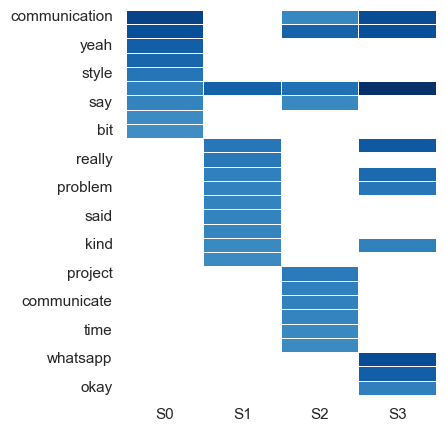

In [48]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.033*"communication" + 0.021*"informal" + 0.021*"yeah" + 0.021*"know" + '
  '0.019*"style" + 0.013*"say" + 0.013*"think" + 0.011*"sort" + 0.011*"idea" + '
  '0.011*"passive"'),
 (1,
  '0.020*"think" + 0.016*"really" + 0.015*"like" + 0.013*"good" + 0.013*"year" '
  '+ 0.013*"said" + 0.012*"well" + 0.011*"six" + 0.011*"chilled" + '
  '0.011*"always"'),
 (2,
  '0.016*"know" + 0.012*"time" + 0.011*"else" + 0.011*"communicate" + '
  '0.011*"project" + 0.011*"think" + 0.010*"someone" + 0.009*"bit" + '
  '0.009*"work" + 0.008*"anything"'),
 (3,
  '0.029*"think" + 0.027*"whatsapp" + 0.022*"communication" + 0.022*"know" + '
  '0.021*"problem" + 0.021*"group" + 0.021*"like" + 0.018*"good" + '
  '0.014*"kind" + 0.011*"done"'),
 (4,
  '0.022*"know" + 0.020*"think" + 0.018*"project" + 0.016*"communication" + '
  '0.012*"like" + 0.012*"someone" + 0.011*"communicate" + 0.011*"research" + '
  '0.011*"else" + 0.009*"issue"')]

Perplexity:  -6.304941184727884

Coherence Score:  0.43107018747267

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.060496  0.052663       1        1  42.276272
4      0.018565 -0.005065       2        1  32.573088
0     -0.095012  0.027976       3        1  14.867944
1      0.001204 -0.050255       4        1   9.925285
2      0.014747 -0.025319       5        1   0.357411, topic_info=            Term       Freq      Total Category  logprob  loglift
24          know  13.000000  13.000000  Default  30.0000  30.0000
151      project   6.000000   6.000000  Default  29.0000  29.0000
7    communicate   5.000000   5.000000  Default  28.0000  28.0000
54          else   3.000000   3.000000  Default  27.0000  27.0000
38         think  14.000000  14.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
87      actually   0.017619   4.769977   Topic5  -4.8909   0.0329
38         think   0.024837  14.909219   Topic5  -4.5475  -0.7633
61           guy   0.014545   3.301178   Topic5  -5.0826   0.2092
34           say   0.016159   4.694877   Topic5  -4.9774  -0.0377
65          like   0.017470   9.747796   Topic5  -4.8994  -0.6903

[295 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
87        1  0.419289  actually
87        2  0.419289  actually
88        1  0.642045  adequate
201       3  0.831399    almost
171       1  0.441760    always
...     ...       ...       ...
82        2  0.214383      yeah
82        3  0.428766      yeah
168       1  0.382514      year
168       2  0.382514      year
168       4  0.382514      year

[253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 2, 3])

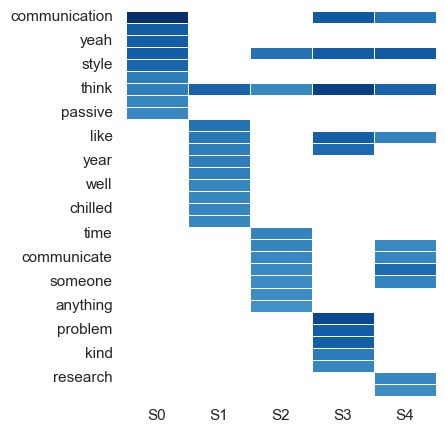

In [49]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 11'

In [50]:
i_stage = 'Sheet 11'

[(0,
  '0.030*"think" + 0.017*"good" + 0.017*"team" + 0.016*"know" + 0.014*"work" + '
  '0.014*"trust" + 0.014*"like" + 0.013*"thing" + 0.013*"term" + '
  '0.011*"trusted"'),
 (1,
  '0.030*"like" + 0.028*"trust" + 0.024*"know" + 0.022*"think" + 0.017*"team" '
  '+ 0.014*"work" + 0.013*"project" + 0.013*"good" + 0.013*"collaboration" + '
  '0.010*"thing"'),
 (2,
  '0.026*"know" + 0.026*"think" + 0.024*"trust" + 0.018*"team" + 0.016*"work" '
  '+ 0.016*"like" + 0.013*"project" + 0.011*"thing" + 0.010*"trusted" + '
  '0.009*"well"')]

Perplexity:  -6.014749382207662

Coherence Score:  0.29197101762121463
(13, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.019424 -0.004057       1        1  37.877352
2     -0.003391  0.006538       2        1  36.657078
0      0.022815 -0.002482       3        1  25.465570, topic_info=            Term       Freq      Total Category  logprob  loglift
137         term   3.000000   3.000000  Default  30.0000  30.0000
11          good   6.000000   6.000000  Default  29.0000  29.0000
220     negative   1.000000   1.000000  Default  28.0000  28.0000
30         think  13.000000  13.000000  Default  27.0000  27.0000
204  cooperation   1.000000   1.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
82       working   0.963349   3.305809   Topic3  -4.9629   0.1348
19        needed   0.945925   3.309244   Topic3  -4.9812   0.1155
123          lot   0.892863   4.046999   Topic3  -5.0389  -0.1435
182       pretty   0.859868   3.370948   Topic3  -5.0766   0.0017
93          time   0.864009   4.075300   Topic3  -5.0717  -0.1833

[197 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         2  0.506286        able
0         3  0.506286        able
201       3  0.800282  accomplish
202       3  0.787185    achieved
3         2  0.757118       apart
...     ...       ...         ...
36        2  0.307797        yeah
36        3  0.307797        yeah
72        1  0.385756        year
72        2  0.385756        year
72        3  0.385756        year

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

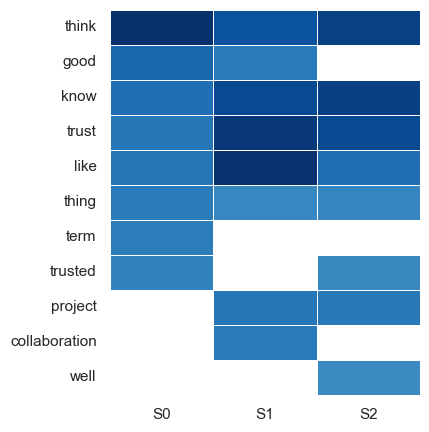

In [51]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.028*"think" + 0.023*"good" + 0.021*"team" + 0.014*"work" + 0.014*"trust" '
  '+ 0.013*"know" + 0.012*"kind" + 0.012*"everyone" + 0.011*"trusted" + '
  '0.011*"yeah"'),
 (1,
  '0.030*"like" + 0.028*"know" + 0.027*"trust" + 0.019*"think" + 0.017*"work" '
  '+ 0.016*"team" + 0.016*"project" + 0.015*"collaboration" + 0.013*"good" + '
  '0.012*"thing"'),
 (2,
  '0.026*"know" + 0.025*"trust" + 0.024*"think" + 0.018*"work" + 0.016*"like" '
  '+ 0.015*"team" + 0.013*"project" + 0.011*"lot" + 0.011*"thing" + '
  '0.010*"everyone"'),
 (3,
  '0.035*"think" + 0.020*"like" + 0.020*"trust" + 0.019*"know" + 0.019*"team" '
  '+ 0.017*"well" + 0.015*"really" + 0.013*"level" + 0.012*"member" + '
  '0.012*"good"')]

Perplexity:  -6.140572107212821

Coherence Score:  0.2963572070335976
(19, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.020812  0.012814       1        1  38.147839
3      0.046757  0.010963       2        1  26.704528
0      0.011427 -0.023248       3        1  18.189918
1     -0.037371 -0.000528       4        1  16.957715, topic_info=              Term      Freq     Total Category  logprob  loglift
11            good  6.000000  6.000000  Default  30.0000  30.0000
62            like  9.000000  9.000000  Default  29.0000  29.0000
21          really  2.000000  2.000000  Default  28.0000  28.0000
5    collaboration  4.000000  4.000000  Default  27.0000  27.0000
50          member  3.000000  3.000000  Default  26.0000  26.0000
..             ...       ...       ...      ...      ...      ...
143         around  0.582647  2.702420   Topic4  -5.0591   0.2401
38            come  0.564050  2.787773   Topic4  -5.0916   0.1766
182         pretty  0.570754  3.147174   Topic4  -5.0798   0.0671
20            okay  0.541427  2.573653   Topic4  -5.1325   0.2156
116            got  0.542927  2.697168   Topic4  -5.1298   0.1715

[234 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.454528        able
0         2  0.454528        able
1         1  0.461864  absolutely
1         2  0.461864  absolutely
112       1  0.741547    academic
...     ...       ...         ...
82        3  0.314977     working
82        4  0.314977     working
36        1  0.299863        yeah
36        2  0.299863        yeah
36        3  0.299863        yeah

[240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

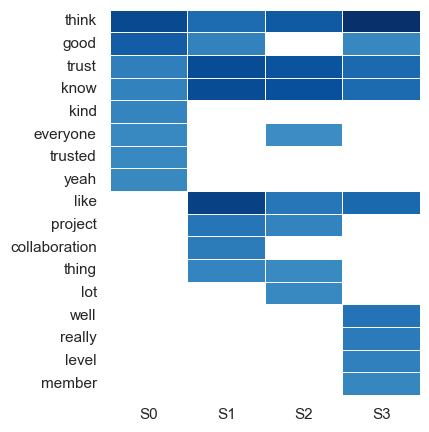

In [52]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.032*"think" + 0.024*"good" + 0.018*"term" + 0.016*"experience" + '
  '0.016*"thing" + 0.014*"work" + 0.013*"team" + 0.012*"know" + '
  '0.012*"negative" + 0.011*"yeah"'),
 (1,
  '0.029*"trust" + 0.027*"know" + 0.023*"like" + 0.020*"think" + 0.018*"team" '
  '+ 0.017*"work" + 0.012*"question" + 0.010*"time" + 0.010*"come" + '
  '0.010*"everyone"'),
 (2,
  '0.028*"know" + 0.026*"trust" + 0.024*"project" + 0.017*"think" + '
  '0.015*"work" + 0.015*"thing" + 0.015*"student" + 0.013*"lot" + 0.012*"team" '
  '+ 0.011*"collaboration"'),
 (3,
  '0.039*"think" + 0.020*"know" + 0.019*"team" + 0.018*"trust" + 0.017*"level" '
  '+ 0.017*"kind" + 0.017*"needed" + 0.017*"good" + 0.014*"pretty" + '
  '0.014*"absolutely"'),
 (4,
  '0.045*"like" + 0.027*"think" + 0.026*"trust" + 0.023*"team" + 0.021*"know" '
  '+ 0.020*"work" + 0.017*"member" + 0.014*"well" + 0.014*"collaboration" + '
  '0.014*"project"')]

Perplexity:  -6.100850135143054

Coherence Score:  0.30564785399793937
(27, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.085038 -0.029107       1        1  30.157865
1     -0.019156  0.019353       2        1  22.515992
2      0.000680  0.051481       3        1  19.316266
3      0.059968 -0.019634       4        1  16.401813
0      0.043547 -0.022093       5        1  11.608064, topic_info=           Term       Freq      Total Category  logprob  loglift
62         like  12.000000  12.000000  Default  30.0000  30.0000
30        think  14.000000  14.000000  Default  29.0000  29.0000
11         good   6.000000   6.000000  Default  28.0000  28.0000
171        kind   3.000000   3.000000  Default  27.0000  27.0000
212  experience   3.000000   3.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
82      working   0.508399   3.180007   Topic5  -4.8164   0.3201
187       quite   0.441790   1.831077   Topic5  -4.9569   0.7316
34         well   0.475312   4.934733   Topic5  -4.8837  -0.1866
52      quality   0.451297   3.581628   Topic5  -4.9356   0.0820
62         like   0.422448  12.037721   Topic5  -5.0016  -1.1963

[278 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.505666        able
1         4  0.502799  absolutely
44        1  0.661706      active
3         4  0.755354       apart
143       2  0.390535      around
...     ...       ...         ...
36        2  0.325686        yeah
36        4  0.325686        yeah
36        5  0.325686        yeah
72        1  0.684854        year
72        2  0.342427        year

[256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

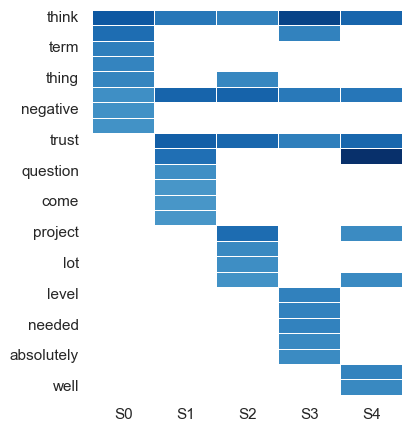

In [53]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 12'

In [54]:
i_stage = 'Sheet 12'

[(0,
  '0.034*"think" + 0.017*"team" + 0.014*"let" + 0.013*"remember" + '
  '0.013*"need" + 0.013*"issue" + 0.013*"really" + 0.011*"time" + 0.011*"done" '
  '+ 0.010*"needed"'),
 (1,
  '0.020*"think" + 0.018*"team" + 0.015*"issue" + 0.012*"student" + '
  '0.010*"let" + 0.009*"like" + 0.009*"remember" + 0.009*"know" + 0.008*"yeah" '
  '+ 0.008*"lot"'),
 (2,
  '0.033*"know" + 0.033*"think" + 0.019*"team" + 0.019*"like" + 0.017*"issue" '
  '+ 0.014*"work" + 0.014*"remember" + 0.013*"thing" + 0.010*"kind" + '
  '0.010*"time"')]

Perplexity:  -5.955538303425147

Coherence Score:  0.45115561794976883
(18, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.022834 -0.001230       1        1  56.198612
0     -0.013260 -0.010811       2        1  35.585329
1     -0.009574  0.012041       3        1   8.216059, topic_info=           Term       Freq      Total Category  logprob  loglift
42         team   8.000000   8.000000  Default  30.0000  30.0000
43        think  15.000000  15.000000  Default  29.0000  29.0000
96      student   3.000000   3.000000  Default  28.0000  28.0000
18        issue   7.000000   7.000000  Default  27.0000  27.0000
24          let   4.000000   4.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
20         know   0.328016  10.339370   Topic3  -4.7512  -0.9516
32       really   0.272445   4.034401   Topic3  -4.9368  -0.1961
69      problem   0.258689   3.154601   Topic3  -4.9886  -0.0019
80   discussion   0.258101   3.282606   Topic3  -4.9909  -0.0440
173        done   0.237601   4.065929   Topic3  -5.0736  -0.3407

[186 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
51        1  0.777467    agree
201       2  0.755727    ahead
202       2  0.762475  aligned
119       1  0.597208   always
52        1  0.777502   behind
...     ...       ...      ...
103       2  0.314990  working
50        1  0.618800     yeah
50        2  0.618800     yeah
116       1  0.765212     year
116       2  0.382606     year

[170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

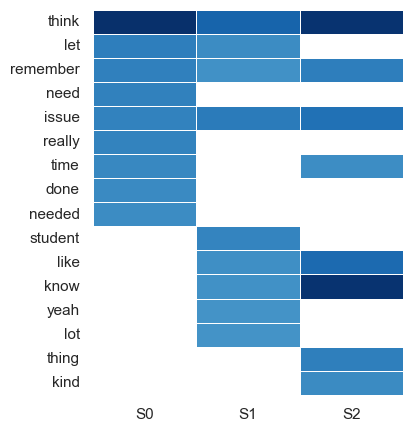

In [55]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.039*"think" + 0.016*"done" + 0.016*"issue" + 0.015*"discussion" + '
  '0.012*"team" + 0.012*"need" + 0.012*"thing" + 0.011*"let" + 0.010*"really" '
  '+ 0.009*"remember"'),
 (1,
  '0.036*"think" + 0.020*"let" + 0.014*"need" + 0.014*"remember" + '
  '0.014*"team" + 0.013*"guy" + 0.012*"time" + 0.012*"know" + 0.010*"discus" + '
  '0.010*"mostly"'),
 (2,
  '0.038*"know" + 0.035*"think" + 0.021*"like" + 0.017*"team" + '
  '0.017*"remember" + 0.016*"issue" + 0.014*"work" + 0.014*"thing" + '
  '0.011*"kind" + 0.010*"holiday"'),
 (3,
  '0.030*"team" + 0.018*"issue" + 0.013*"student" + 0.013*"like" + '
  '0.011*"always" + 0.011*"discussion" + 0.010*"really" + 0.010*"well" + '
  '0.010*"working" + 0.010*"work"')]

Perplexity:  -6.089061916747712

Coherence Score:  0.43706984928742787
(23, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.044918  0.001001       1        1  39.541109
0      0.027219 -0.033305       2        1  31.025892
1     -0.006363 -0.005725       3        1  17.707146
3      0.024062  0.038030       4        1  11.725852, topic_info=           Term      Freq      Total Category  logprob  loglift
42         team  7.000000   7.000000  Default  30.0000  30.0000
20         know  8.000000   8.000000  Default  29.0000  29.0000
80   discussion  3.000000   3.000000  Default  28.0000  28.0000
119      always  1.000000   1.000000  Default  27.0000  27.0000
24          let  4.000000   4.000000  Default  26.0000  26.0000
..          ...       ...        ...      ...      ...      ...
133        kind  0.497729   3.602346   Topic4  -4.6899   0.1641
45         time  0.496999   4.467975   Topic4  -4.6914  -0.0527
225      needed  0.431896   2.634512   Topic4  -4.8318   0.3351
43        think  0.488515  15.406160   Topic4  -4.7086  -1.3078
20         know  0.392194   8.922633   Topic4  -4.9282  -0.9812

[220 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
170       2  0.702363  actually
51        1  0.802628     agree
171       2  0.694535   alright
119       4  0.634895    always
79        2  0.606128    anyone
...     ...       ...       ...
103       1  0.691909   working
103       2  0.345954   working
103       4  0.345954   working
50        3  0.555536      yeah
116       1  0.418441      year

[179 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

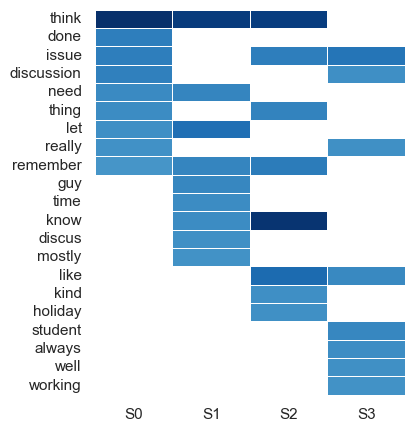

In [56]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.047*"think" + 0.017*"issue" + 0.015*"discussion" + 0.015*"done" + '
  '0.014*"let" + 0.014*"need" + 0.013*"team" + 0.011*"remember" + '
  '0.011*"really" + 0.010*"thing"'),
 (1,
  '0.027*"think" + 0.016*"let" + 0.011*"need" + 0.011*"guy" + 0.010*"team" + '
  '0.010*"remember" + 0.009*"time" + 0.009*"mostly" + 0.009*"least" + '
  '0.009*"know"'),
 (2,
  '0.047*"think" + 0.036*"know" + 0.022*"remember" + 0.019*"issue" + '
  '0.018*"team" + 0.015*"male" + 0.015*"female" + 0.013*"need" + 0.013*"let" + '
  '0.013*"like"'),
 (3,
  '0.027*"team" + 0.020*"issue" + 0.014*"discussion" + 0.013*"student" + '
  '0.012*"needed" + 0.012*"really" + 0.011*"always" + 0.011*"problem" + '
  '0.011*"session" + 0.011*"dedicated"'),
 (4,
  '0.030*"know" + 0.027*"like" + 0.026*"work" + 0.020*"team" + 0.017*"holiday" '
  '+ 0.016*"kind" + 0.015*"think" + 0.013*"thing" + 0.012*"well" + '
  '0.012*"time"')]

Perplexity:  -6.243195017633633

Coherence Score:  0.4042202519185034
(28, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.026359 -0.047148       1        1  34.377453
4     -0.060767  0.033820       2        1  26.690356
3      0.040083  0.050535       3        1  20.338235
0      0.046685 -0.025902       4        1  18.109670
1      0.000358 -0.011306       5        1   0.484286, topic_info=        Term       Freq      Total Category  logprob  loglift
43     think  14.000000  14.000000  Default  30.0000  30.0000
24       let   4.000000   4.000000  Default  29.0000  29.0000
20      know  10.000000  10.000000  Default  28.0000  28.0000
30      need   4.000000   4.000000  Default  27.0000  27.0000
33  remember   5.000000   5.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
32    really   0.013665   3.993167   Topic5  -5.0982  -0.3472
47       two   0.012474   1.843624   Topic5  -5.1894   0.3344
44     three   0.012812   2.627417   Topic5  -5.1627   0.0069
8     female   0.012902   3.368481   Topic5  -5.1557  -0.2346
7       ever   0.012559   2.522414   Topic5  -5.1827   0.0277

[271 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.846157   africa
119       2  0.481472   always
119       3  0.481472   always
239       3  0.733569  amongst
148       2  0.822489   answer
...     ...       ...      ...
103       3  0.294027  working
50        1  0.522132     yeah
50        3  0.522132     yeah
116       1  0.382215     year
116       2  0.382215     year

[240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 1, 2])

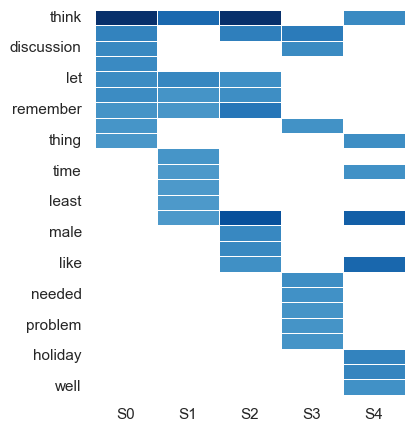

In [57]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 13'

In [58]:
i_stage = 'Sheet 13'

[(0,
  '0.023*"work" + 0.023*"goal" + 0.018*"think" + 0.015*"need" + 0.014*"go" + '
  '0.013*"done" + 0.013*"team" + 0.012*"oh" + 0.011*"needed" + 0.011*"pretty"'),
 (1,
  '0.031*"like" + 0.026*"student" + 0.021*"think" + 0.021*"project" + '
  '0.016*"goal" + 0.016*"work" + 0.016*"done" + 0.015*"mrn" + 0.014*"research" '
  '+ 0.012*"know"'),
 (2,
  '0.040*"goal" + 0.033*"think" + 0.032*"team" + 0.026*"work" + '
  '0.020*"individual" + 0.015*"project" + 0.013*"say" + 0.012*"arend" + '
  '0.011*"others" + 0.010*"needed"')]

Perplexity:  -5.700311976337546

Coherence Score:  0.4291002834510252
(20, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.028916  0.023439       1        1  44.603720
1      0.044778  0.005046       2        1  40.128122
0     -0.015862 -0.028486       3        1  15.268158, topic_info=         Term       Freq      Total Category  logprob  loglift
44       team  10.000000  10.000000  Default  30.0000  30.0000
56         oh   1.000000   1.000000  Default  29.0000  29.0000
54       goal  15.000000  15.000000  Default  28.0000  28.0000
49       work  12.000000  12.000000  Default  27.0000  27.0000
224    pretty   2.000000   2.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
181      meet   0.519538   1.926417   Topic3  -5.1158   0.5689
5         bit   0.613510   4.895028   Topic3  -4.9495  -0.1974
136       got   0.582579   4.194839   Topic3  -5.0012  -0.0947
125  research   0.581626   4.994521   Topic3  -5.0029  -0.2709
128   student   0.598409   8.851978   Topic3  -4.9744  -0.8147

[187 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.346463       able
0         2  0.692926       able
159       2  0.707404   academic
51        3  0.903562  achieving
67        1  0.825528   actually
...     ...       ...        ...
50        2  0.535501    working
50        3  0.178500    working
235       1  0.822271       yeah
158       1  0.343882       year
158       2  0.687765       year

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

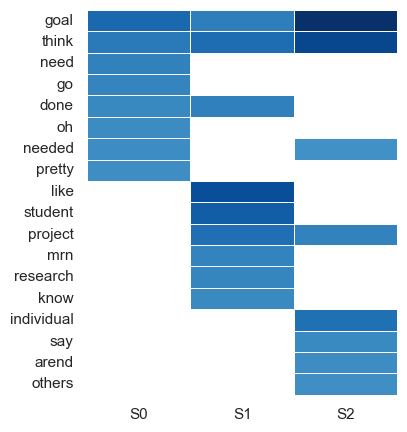

In [59]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.026*"work" + 0.023*"goal" + 0.017*"oh" + 0.017*"done" + 0.015*"think" + '
  '0.014*"team" + 0.012*"project" + 0.011*"need" + 0.011*"knew" + 0.011*"go"'),
 (1,
  '0.031*"like" + 0.026*"student" + 0.023*"project" + 0.019*"think" + '
  '0.018*"research" + 0.018*"done" + 0.017*"mrn" + 0.016*"work" + 0.015*"goal" '
  '+ 0.013*"know"'),
 (2,
  '0.027*"goal" + 0.024*"work" + 0.024*"team" + 0.022*"think" + '
  '0.017*"individual" + 0.017*"project" + 0.016*"say" + 0.011*"ambition" + '
  '0.011*"others" + 0.011*"much"'),
 (3,
  '0.042*"goal" + 0.040*"think" + 0.026*"team" + 0.023*"work" + '
  '0.017*"individual" + 0.015*"like" + 0.015*"working" + 0.013*"need" + '
  '0.012*"needed" + 0.012*"student"')]

Perplexity:  -5.939663089248952

Coherence Score:  0.420487062300015
(22, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.042990  0.018131       1        1  33.765645
1      0.054613  0.010582       2        1  30.510736
2     -0.007431 -0.025067       3        1  28.776743
0     -0.004192 -0.003646       4        1   6.946876, topic_info=           Term       Freq      Total Category  logprob  loglift
49         work  12.000000  12.000000  Default  30.0000  30.0000
54         goal  15.000000  15.000000  Default  29.0000  29.0000
52         done   6.000000   6.000000  Default  28.0000  28.0000
56           oh   1.000000   1.000000  Default  27.0000  27.0000
44         team  10.000000  10.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
128     student   0.274158   8.843006   Topic4  -4.9675  -0.8068
5           bit   0.240712   4.962686   Topic4  -5.0976  -0.3592
2         arend   0.235587   4.952361   Topic4  -5.1192  -0.3787
60   individual   0.236839   7.171722   Topic4  -5.1139  -0.7436
48   university   0.224039   4.237037   Topic4  -5.1694  -0.2729

[249 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.347329      able
0         2  0.694658      able
0         3  0.347329      able
159       2  0.711795  academic
104       2  0.739373    always
...     ...       ...       ...
50        1  0.520063   working
50        2  0.346709   working
50        3  0.173354   working
234       1  0.747448  workshop
235       1  0.752247      yeah

[253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

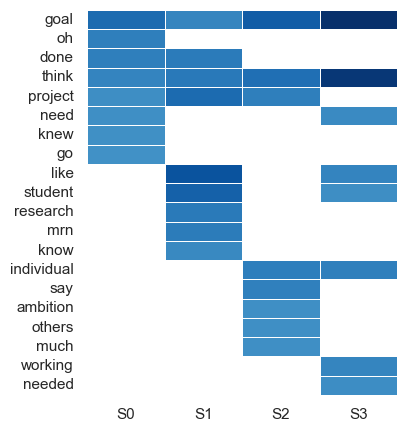

In [60]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.032*"goal" + 0.027*"work" + 0.021*"team" + 0.020*"oh" + 0.018*"person" + '
  '0.017*"done" + 0.016*"trade" + 0.016*"need" + 0.016*"think" + 0.015*"go"'),
 (1,
  '0.027*"project" + 0.021*"like" + 0.021*"student" + 0.019*"mrn" + '
  '0.018*"research" + 0.018*"done" + 0.018*"think" + 0.016*"stake" + '
  '0.013*"time" + 0.013*"degree"'),
 (2,
  '0.033*"goal" + 0.032*"team" + 0.025*"work" + 0.023*"think" + 0.022*"say" + '
  '0.021*"individual" + 0.016*"ambition" + 0.015*"others" + 0.015*"project" + '
  '0.012*"much"'),
 (3,
  '0.045*"goal" + 0.044*"think" + 0.027*"team" + 0.021*"work" + '
  '0.019*"working" + 0.017*"individual" + 0.016*"needed" + 0.014*"specific" + '
  '0.013*"project" + 0.013*"pretty"'),
 (4,
  '0.042*"like" + 0.030*"student" + 0.026*"work" + 0.022*"think" + '
  '0.018*"goal" + 0.016*"got" + 0.015*"project" + 0.014*"done" + '
  '0.013*"objective" + 0.013*"individual"')]

Perplexity:  -5.928976309468085

Coherence Score:  0.4546974379770051
(29, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.060969  0.032103       1        1  29.071223
4      0.050194  0.018978       2        1  23.393121
1      0.072092 -0.010285       3        1  21.895776
2     -0.023233  0.012963       4        1  18.808768
0     -0.038084 -0.053759       5        1   6.831112, topic_info=       Term       Freq      Total Category  logprob  loglift
118    like   9.000000   9.000000  Default  30.0000  30.0000
44     team  10.000000  10.000000  Default  29.0000  29.0000
54     goal  16.000000  16.000000  Default  28.0000  28.0000
76   person   2.000000   2.000000  Default  27.0000  27.0000
49     work  12.000000  12.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
54     goal   1.228487  16.225127   Topic5  -3.4509   0.1029
44     team   0.802132  10.437765   Topic5  -3.8772   0.1178
224  pretty   0.290396   2.960896   Topic5  -4.8932   0.3617
46    think   0.628155  15.443665   Topic5  -4.1216  -0.5185
24   needed   0.305509   5.080788   Topic5  -4.8425  -0.1276

[270 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.350319      able
0         2  0.350319      able
0         3  0.350319      able
159       3  0.724750  academic
131       2  0.752480        ag
...     ...       ...       ...
50        3  0.164701   working
234       1  0.689093  workshop
235       1  0.699054      yeah
158       2  0.736901      year
158       3  0.368451      year

[286 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

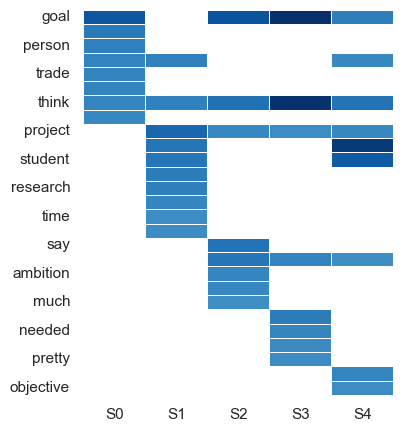

In [61]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 14'

In [62]:
i_stage = 'Sheet 14'

[(0,
  '0.023*"help" + 0.019*"work" + 0.018*"engineering" + 0.015*"student" + '
  '0.014*"well" + 0.014*"usually" + 0.013*"know" + 0.012*"priority" + '
  '0.012*"arend" + 0.012*"thing"'),
 (1,
  '0.033*"think" + 0.026*"help" + 0.020*"work" + 0.016*"done" + 0.015*"good" + '
  '0.014*"student" + 0.014*"like" + 0.013*"say" + 0.012*"come" + 0.012*"lot"'),
 (2,
  '0.032*"student" + 0.030*"help" + 0.019*"usually" + 0.017*"work" + '
  '0.016*"think" + 0.014*"person" + 0.013*"environment" + 0.012*"struggling" + '
  '0.011*"day" + 0.011*"know"')]

Perplexity:  -5.7193280968038716

Coherence Score:  0.40628427895731867
(21, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.024942  0.016987       1        1  41.411729
1      0.036612  0.004669       2        1  40.487421
0     -0.011670 -0.021656       3        1  18.100850, topic_info=            Term      Freq     Total Category  logprob  loglift
108  engineering  2.000000  2.000000  Default  30.0000  30.0000
113         know  2.000000  2.000000  Default  29.0000  29.0000
87          well  2.000000  2.000000  Default  28.0000  28.0000
119     priority  1.000000  1.000000  Default  27.0000  27.0000
125        thing  1.000000  1.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
34          else  0.501933  2.450932   Topic3  -4.6872   0.1235
101     actually  0.497235  2.513583   Topic3  -4.6966   0.0888
18           say  0.516233  3.114928   Topic3  -4.6591  -0.0882
72           got  0.470834  2.505776   Topic3  -4.7511   0.0374
2           good  0.435641  3.125801   Topic3  -4.8288  -0.2614

[173 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         2  0.803977        able
128       1  0.770863  accomplish
62        1  0.520882      across
62        2  0.520882      across
101       1  0.397838    actually
...     ...       ...         ...
91        2  0.356097        work
91        3  0.178048        work
60        2  0.550840        yeah
61        1  0.396583     younger
61        2  0.396583     younger

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

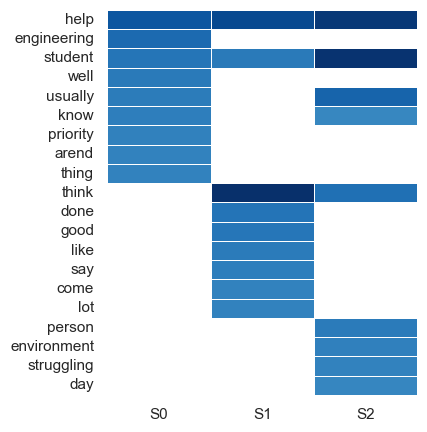

In [63]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.020*"say" + 0.020*"engineering" + 0.019*"help" + 0.016*"ask" + '
  '0.016*"without" + 0.016*"asking" + 0.016*"work" + 0.015*"majority" + '
  '0.015*"certain" + 0.015*"uh"'),
 (1,
  '0.031*"help" + 0.021*"good" + 0.019*"join" + 0.017*"come" + 0.016*"machine" '
  '+ 0.015*"yeah" + 0.015*"term" + 0.014*"answer" + 0.014*"work" + '
  '0.014*"student"'),
 (2,
  '0.048*"student" + 0.032*"usually" + 0.024*"help" + 0.017*"person" + '
  '0.017*"environment" + 0.016*"struggling" + 0.015*"work" + 0.014*"going" + '
  '0.014*"came" + 0.013*"like"'),
 (3,
  '0.046*"think" + 0.031*"help" + 0.026*"work" + 0.026*"done" + 0.020*"day" + '
  '0.016*"lot" + 0.016*"come" + 0.016*"actually" + 0.014*"else" + '
  '0.014*"next"')]

Perplexity:  -5.7156127389563

Coherence Score:  0.36259355212288963
(32, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.086680 -0.002397       1        1  30.903846
3     -0.064256  0.034285       2        1  27.592628
1     -0.036540 -0.056476       3        1  21.250379
0      0.014116  0.024588       4        1  20.253147, topic_info=         Term      Freq     Total Category  logprob  loglift
53      think  5.000000  5.000000  Default  30.0000  30.0000
149      done  2.000000  2.000000  Default  29.0000  29.0000
52    student  6.000000  6.000000  Default  28.0000  28.0000
94       join  1.000000  1.000000  Default  27.0000  27.0000
148       day  2.000000  2.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
97       need  0.560863  2.596860   Topic4  -4.6885   0.0643
101  actually  0.535668  2.323803   Topic4  -4.7345   0.1294
55       time  0.533356  2.355620   Topic4  -4.7388   0.1115
46      often  0.527625  1.847261   Topic4  -4.7496   0.3438
72        got  0.528285  2.489807   Topic4  -4.7484   0.0465

[204 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.806125        able
128       1  0.732913  accomplish
62        1  0.496463      across
63        1  0.746997      actual
101       2  0.430329    actually
...     ...       ...         ...
173       2  0.866690     working
60        3  0.554072        yeah
61        1  0.390762     younger
61        2  0.390762     younger
61        3  0.390762     younger

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

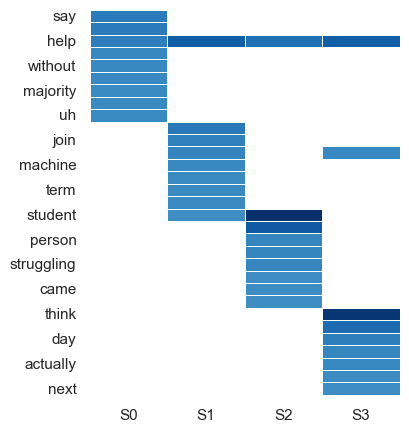

In [64]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.031*"student" + 0.021*"large" + 0.021*"case" + 0.018*"know" + '
  '0.016*"struggling" + 0.013*"engineering" + 0.012*"need" + '
  '0.012*"environment" + 0.011*"thing" + 0.011*"help"'),
 (1,
  '0.026*"student" + 0.021*"usually" + 0.019*"think" + 0.017*"younger" + '
  '0.015*"mpy" + 0.014*"help" + 0.013*"team" + 0.012*"like" + 0.012*"across" + '
  '0.011*"work"'),
 (2,
  '0.044*"student" + 0.025*"person" + 0.024*"environment" + 0.021*"struggling" '
  '+ 0.017*"everyone" + 0.017*"field" + 0.017*"willing" + 0.017*"different" + '
  '0.017*"open" + 0.017*"expertise"'),
 (3,
  '0.050*"think" + 0.028*"done" + 0.028*"help" + 0.024*"work" + 0.020*"come" + '
  '0.018*"day" + 0.017*"like" + 0.017*"lot" + 0.015*"answer" + 0.015*"term"'),
 (4,
  '0.048*"help" + 0.026*"work" + 0.023*"usually" + 0.023*"good" + '
  '0.018*"engineering" + 0.018*"say" + 0.017*"well" + 0.016*"join" + '
  '0.015*"ask" + 0.014*"need"')]

Perplexity:  -5.88259416967041

Coherence Score:  0.3773508770469045
(36, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.041346  0.082638       1        1  43.790991
3      0.101297 -0.003586       2        1  28.372172
1      0.025588  0.001329       3        1  14.642037
2     -0.048252 -0.068285       4        1  12.100821
0     -0.037289 -0.012097       5        1   1.093979, topic_info=            Term      Freq     Total Category  logprob  loglift
52       student  5.000000  5.000000  Default  30.0000  30.0000
113         know  2.000000  2.000000  Default  29.0000  29.0000
108  engineering  2.000000  2.000000  Default  28.0000  28.0000
53         think  6.000000  6.000000  Default  27.0000  27.0000
68          case  1.000000  1.000000  Default  26.0000  26.0000
..           ...       ...       ...      ...      ...      ...
108  engineering  0.042467  2.862627   Topic5  -4.3508   0.3046
103        arend  0.032033  2.085502   Topic5  -4.6327   0.3394
119     priority  0.030912  2.108848   Topic5  -4.6684   0.2926
91          work  0.034098  6.298511   Topic5  -4.5703  -0.7035
3           help  0.034772  9.706796   Topic5  -4.5507  -1.1164

[237 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.674755      able
62        1  0.494917    across
62        3  0.494917    across
101       1  0.376798  actually
101       2  0.376798  actually
...     ...       ...       ...
173       2  0.876299   working
60        1  0.476583      yeah
61        1  0.378297   younger
61        2  0.378297   younger
61        3  0.378297   younger

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

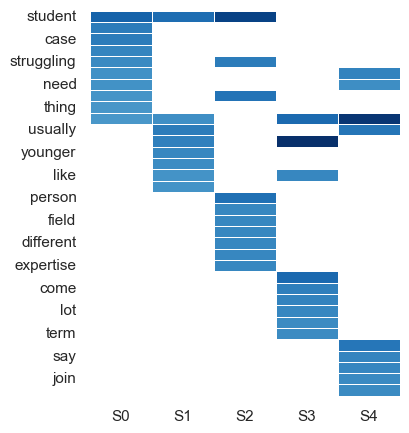

In [65]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 15'

In [66]:
i_stage = 'Sheet 15'

[(0,
  '0.019*"level" + 0.016*"put" + 0.015*"say" + 0.015*"team" + 0.014*"think" + '
  '0.014*"quality" + 0.014*"effort" + 0.013*"research" + 0.012*"quite" + '
  '0.012*"time"'),
 (1,
  '0.058*"think" + 0.032*"effort" + 0.024*"put" + 0.023*"level" + 0.018*"lot" '
  '+ 0.018*"team" + 0.017*"result" + 0.015*"fly" + 0.014*"say" + 0.013*"goal"'),
 (2,
  '0.034*"think" + 0.020*"effort" + 0.019*"time" + 0.018*"put" + 0.018*"level" '
  '+ 0.015*"team" + 0.015*"bit" + 0.014*"say" + 0.011*"like" + 0.010*"lot"')]

Perplexity:  -5.680663236868359

Coherence Score:  0.31981837581049294
(16, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.021079  0.008113       1        1  60.660938
2     -0.000768 -0.017183       2        1  27.495307
0     -0.020311  0.009070       3        1  11.843755, topic_info=              Term      Freq      Total Category  logprob  loglift
99         quality  2.000000   2.000000  Default  30.0000  30.0000
124       research  1.000000   1.000000  Default  29.0000  29.0000
119  manufacturing  1.000000   1.000000  Default  28.0000  28.0000
41           level  6.000000   6.000000  Default  27.0000  27.0000
50           quite  2.000000   2.000000  Default  26.0000  26.0000
..             ...       ...        ...      ...      ...      ...
15           think  0.530711  14.271777   Topic3  -4.2367  -1.1585
68            test  0.304175   2.591237   Topic3  -4.7934  -0.0089
23            goal  0.314369   3.358350   Topic3  -4.7604  -0.2353
80            okay  0.277104   1.837018   Topic3  -4.8866   0.2419
57          pretty  0.275233   1.842741   Topic3  -4.8933   0.2320

[169 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.980053  achieved
164       1  0.819098  actually
164       2  0.819098  actually
62        1  0.503192    always
62        2  0.503192    always
...     ...       ...       ...
71        1  0.544648    worked
60        1  0.486805     world
60        2  0.486805     world
35        1  0.504932      yeah
66        1  0.501930      year

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

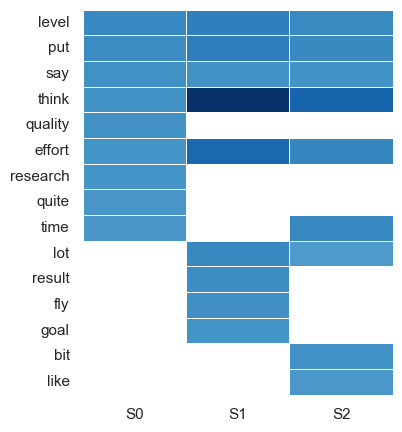

In [67]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.018*"quality" + 0.016*"level" + 0.015*"research" + 0.015*"think" + '
  '0.014*"manufacturing" + 0.014*"lot" + 0.014*"say" + 0.013*"enough" + '
  '0.012*"quite" + 0.011*"guy"'),
 (1,
  '0.056*"think" + 0.021*"goal" + 0.021*"effort" + 0.020*"fly" + 0.019*"lot" + '
  '0.018*"arend" + 0.018*"time" + 0.017*"level" + 0.017*"put" + 0.016*"even"'),
 (2,
  '0.028*"effort" + 0.025*"think" + 0.024*"put" + 0.022*"level" + 0.019*"bit" '
  '+ 0.017*"time" + 0.017*"say" + 0.015*"done" + 0.015*"like" + 0.013*"team"'),
 (3,
  '0.047*"think" + 0.034*"effort" + 0.027*"put" + 0.026*"team" + 0.025*"level" '
  '+ 0.020*"result" + 0.015*"like" + 0.014*"lot" + 0.013*"class" + '
  '0.013*"world"')]

Perplexity:  -5.849836150976848

Coherence Score:  0.4488139197257437
(24, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.017368  0.033883       1        1  54.562139
1      0.034293 -0.000023       2        1  25.022020
0      0.019449 -0.011507       3        1  13.298943
2     -0.036374 -0.022354       4        1   7.116898, topic_info=       Term       Freq      Total Category  logprob  loglift
1    effort   8.000000   8.000000  Default  30.0000  30.0000
15    think  13.000000  13.000000  Default  29.0000  29.0000
12      put   6.000000   6.000000  Default  28.0000  28.0000
18      bit   2.000000   2.000000  Default  27.0000  27.0000
41    level   6.000000   6.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
162  system   0.174206   1.869059   Topic4  -4.8414   0.2697
151   noise   0.172718   1.893422   Topic4  -4.8500   0.2482
33     team   0.289125   5.933831   Topic4  -4.3348  -0.3789
22       go   0.180197   2.560516   Topic4  -4.8076  -0.0112
7      know   0.161905   1.832232   Topic4  -4.9146   0.2164

[208 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
73        1  0.772971  according
0         2  0.608292   achieved
52        1  0.634748      align
62        1  0.482483     always
62        2  0.482483     always
...     ...       ...        ...
35        1  0.479728       yeah
35        2  0.479728       yeah
66        1  0.576978       year
66        2  0.576978       year
61        1  0.634467        yet

[159 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

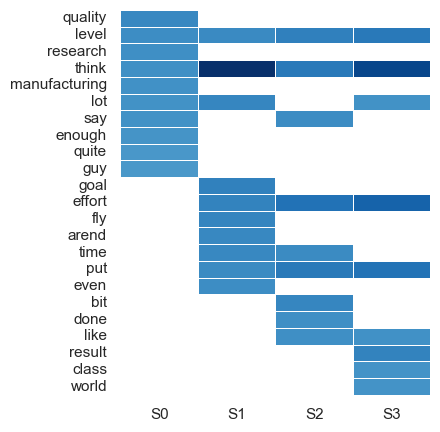

In [68]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.020*"team" + 0.017*"put" + 0.014*"project" + 0.013*"effort" + '
  '0.011*"result" + 0.010*"say" + 0.010*"like" + 0.010*"level" + '
  '0.010*"question" + 0.009*"failure"'),
 (1,
  '0.038*"think" + 0.027*"goal" + 0.024*"arend" + 0.022*"time" + 0.020*"fly" + '
  '0.018*"even" + 0.017*"level" + 0.016*"effort" + 0.015*"worked" + '
  '0.014*"team"'),
 (2,
  '0.031*"put" + 0.026*"bit" + 0.022*"level" + 0.021*"time" + 0.021*"say" + '
  '0.021*"done" + 0.017*"think" + 0.017*"effort" + 0.017*"together" + '
  '0.017*"left"'),
 (3,
  '0.032*"effort" + 0.030*"level" + 0.029*"think" + 0.028*"team" + 0.027*"put" '
  '+ 0.021*"result" + 0.018*"class" + 0.018*"world" + 0.016*"like" + '
  '0.014*"well"'),
 (4,
  '0.078*"think" + 0.032*"effort" + 0.030*"lot" + 0.018*"put" + 0.018*"end" + '
  '0.017*"level" + 0.016*"time" + 0.015*"guy" + 0.015*"design" + 0.015*"fly"')]

Perplexity:  -5.918566871491113

Coherence Score:  0.5492131710844245
(28, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.025283  0.054244       1        1  33.391457
4      0.084082 -0.016162       2        1  32.216192
2     -0.056626 -0.046901       3        1  23.016625
1      0.016839  0.006754       4        1  10.608757
0     -0.019012  0.002065       5        1   0.766969, topic_info=        Term       Freq      Total Category  logprob  loglift
33      team   5.000000   5.000000  Default  30.0000  30.0000
12       put   7.000000   7.000000  Default  29.0000  29.0000
15     think  13.000000  13.000000  Default  28.0000  28.0000
29   project   2.000000   2.000000  Default  27.0000  27.0000
14    result   3.000000   3.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
41     level   0.022722   7.033594   Topic5  -4.6505  -0.8647
18       bit   0.017738   3.527716   Topic5  -4.8981  -0.4222
131     done   0.015064   2.248087   Topic5  -5.0616  -0.1351
66      year   0.014496   1.572790   Topic5  -5.1000   0.1837
23      goal   0.014553   2.336189   Topic5  -5.0960  -0.2080

[252 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.683429  achieved
164       3  0.632640  actually
52        1  0.705295     align
62        2  0.621654    always
17        4  0.590527     arend
...     ...       ...       ...
71        1  0.678405    worked
60        1  0.887506     world
35        1  0.575746      yeah
35        2  0.575746      yeah
61        1  0.705194       yet

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 2, 1])

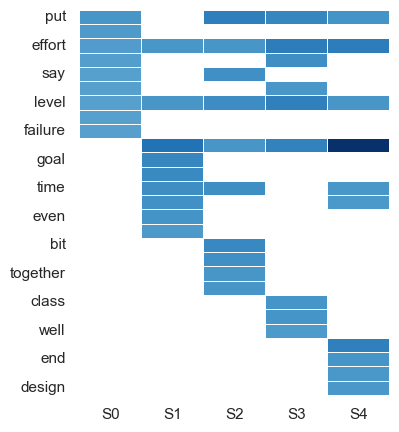

In [69]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 16'

In [70]:
i_stage = 'Sheet 16'

[(0,
  '0.028*"really" + 0.025*"think" + 0.023*"project" + 0.016*"like" + '
  '0.015*"wing" + 0.014*"experience" + 0.014*"know" + 0.013*"good" + '
  '0.012*"sub" + 0.011*"communication"'),
 (1,
  '0.024*"project" + 0.023*"think" + 0.022*"know" + 0.018*"good" + '
  '0.017*"team" + 0.014*"communication" + 0.014*"like" + 0.012*"uav" + '
  '0.012*"connect" + 0.011*"well"'),
 (2,
  '0.021*"think" + 0.020*"good" + 0.017*"project" + 0.016*"know" + '
  '0.015*"communication" + 0.014*"team" + 0.010*"well" + 0.010*"collaboration" '
  '+ 0.009*"worked" + 0.008*"catapult"')]

Perplexity:  -5.9072754400383145

Coherence Score:  0.31213135562879196
(17, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.017713  0.010043       1        1  44.057843
0      0.027955  0.001964       2        1  42.953946
2     -0.010242 -0.012007       3        1  12.988210, topic_info=              Term       Freq      Total Category  logprob  loglift
56          really   6.000000   6.000000  Default  30.0000  30.0000
13            good   7.000000   7.000000  Default  29.0000  29.0000
37           think  10.000000  10.000000  Default  28.0000  28.0000
50   communication   5.000000   5.000000  Default  27.0000  27.0000
160           team   5.000000   5.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
56          really   0.436246   6.730517   Topic3  -4.8932  -0.6951
30        remember   0.372777   2.666987   Topic3  -5.0504   0.0734
8           design   0.382981   3.377599   Topic3  -5.0234  -0.1358
67            like   0.409477   6.259698   Topic3  -4.9565  -0.6859
23            need   0.379857   3.412613   Topic3  -5.0316  -0.1543

[193 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
141       1  0.733537    aircraft
141       2  0.366768    aircraft
47        2  0.754983     amongst
48        2  0.754943      anyway
49        1  0.369755  applicable
...     ...       ...         ...
45        2  0.633200      worked
45        3  0.316600      worked
46        1  0.766380        yeah
165       1  0.388012        year
165       2  0.388012        year

[190 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

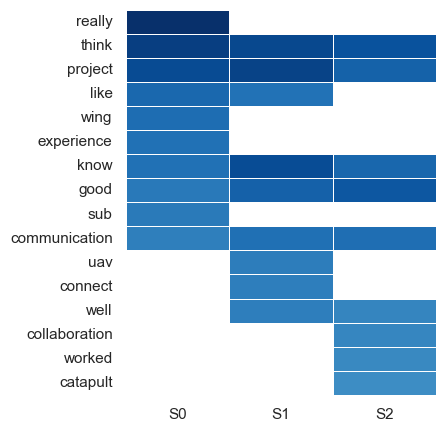

In [71]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.029*"really" + 0.027*"think" + 0.020*"project" + 0.019*"like" + '
  '0.017*"wing" + 0.016*"experience" + 0.015*"know" + 0.014*"good" + '
  '0.013*"sub" + 0.012*"state"'),
 (1,
  '0.026*"know" + 0.022*"think" + 0.022*"team" + 0.022*"good" + '
  '0.015*"project" + 0.012*"well" + 0.011*"uav" + 0.011*"like" + '
  '0.011*"system" + 0.011*"need"'),
 (2,
  '0.022*"think" + 0.022*"communication" + 0.017*"good" + 0.016*"know" + '
  '0.016*"project" + 0.014*"well" + 0.013*"team" + 0.013*"like" + '
  '0.012*"level" + 0.012*"mainly"'),
 (3,
  '0.042*"project" + 0.022*"u" + 0.020*"communication" + 0.019*"think" + '
  '0.018*"effective" + 0.018*"clear" + 0.018*"specific" + 0.014*"connect" + '
  '0.014*"sub" + 0.013*"worked"')]

Perplexity:  -5.980638607671218

Coherence Score:  0.30008153516776526
(24, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.053967  0.011172       1        1  42.011287
1      0.016269 -0.029526       2        1  33.873295
3     -0.068724  0.001410       3        1  20.281777
2     -0.001512  0.016944       4        1   3.833640, topic_info=              Term       Freq      Total Category  logprob  loglift
50   communication   5.000000   5.000000  Default  30.0000  30.0000
29         project  10.000000  10.000000  Default  29.0000  29.0000
37           think  10.000000  10.000000  Default  28.0000  28.0000
160           team   5.000000   5.000000  Default  27.0000  27.0000
13            good   7.000000   7.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
79              ja   0.117969   2.593856   Topic4  -4.9808   0.1709
86          needed   0.110299   2.611875   Topic4  -5.0480   0.0967
101           wing   0.127346   4.775038   Topic4  -4.9043  -0.3629
121           done   0.103314   3.386494   Topic4  -5.1134  -0.2284
23            need   0.102068   3.380240   Topic4  -5.1256  -0.2387

[222 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
184       2  0.742607      able
141       1  0.365459  aircraft
141       2  0.365459  aircraft
47        1  0.749670   amongst
142       1  0.507217   another
...     ...       ...       ...
45        2  0.294959    worked
45        3  0.294959    worked
164       1  0.822767   working
165       1  0.396388      year
165       2  0.396388      year

[202 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

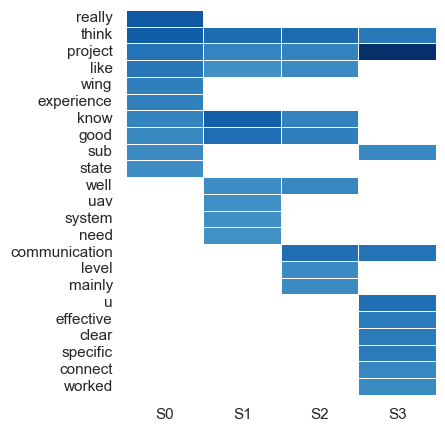

In [72]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.032*"really" + 0.027*"like" + 0.024*"think" + 0.016*"project" + '
  '0.015*"know" + 0.015*"experience" + 0.013*"worked" + 0.013*"kind" + '
  '0.012*"team" + 0.012*"tunnel"'),
 (1,
  '0.026*"know" + 0.024*"team" + 0.021*"think" + 0.019*"project" + 0.016*"uav" '
  '+ 0.016*"need" + 0.015*"connect" + 0.015*"system" + 0.014*"catapult" + '
  '0.014*"design"'),
 (2,
  '0.025*"good" + 0.022*"think" + 0.022*"know" + 0.013*"collaboration" + '
  '0.013*"wing" + 0.013*"idea" + 0.013*"team" + 0.012*"general" + '
  '0.012*"building" + 0.010*"typically"'),
 (3,
  '0.046*"project" + 0.030*"communication" + 0.025*"think" + 0.022*"u" + '
  '0.018*"clear" + 0.018*"effective" + 0.018*"specific" + 0.015*"like" + '
  '0.013*"worked" + 0.012*"sub"'),
 (4,
  '0.029*"good" + 0.026*"think" + 0.024*"really" + 0.021*"project" + '
  '0.021*"wing" + 0.020*"production" + 0.018*"sub" + 0.017*"communication" + '
  '0.017*"collaboration" + 0.016*"know"')]

Perplexity:  -5.986647358962467

Coherence Score:  0

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.029189  0.051354       1        1  42.743412
4      0.073933 -0.042915       2        1  22.270154
0      0.036887  0.047068       3        1  17.750264
3     -0.089861 -0.034584       4        1  10.207203
2      0.008230 -0.020924       5        1   7.028968, topic_info=              Term      Freq      Total Category  logprob  loglift
29         project  9.000000   9.000000  Default  30.0000  30.0000
56          really  5.000000   5.000000  Default  29.0000  29.0000
50   communication  5.000000   5.000000  Default  28.0000  28.0000
13            good  7.000000   7.000000  Default  27.0000  27.0000
67            like  5.000000   5.000000  Default  26.0000  26.0000
..             ...       ...        ...      ...      ...      ...
101           wing  0.416253   4.431078   Topic5  -4.3261   0.2900
18            know  0.677681   8.886148   Topic5  -3.8387   0.0816
37           think  0.683957  10.337562   Topic5  -3.8295  -0.0605
160           team  0.400833   7.201764   Topic5  -4.3639  -0.2334
44            well  0.266570   3.909245   Topic5  -4.7718  -0.0303

[245 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
185       1  0.440662  actually
141       1  0.618271  aircraft
47        2  0.778220   amongst
142       1  0.432110   another
214       3  0.928226    anyone
...     ...       ...       ...
45        3  0.363943    worked
45        4  0.363943    worked
102       2  0.801267     world
165       1  0.697822      year
165       3  0.348911      year

[187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

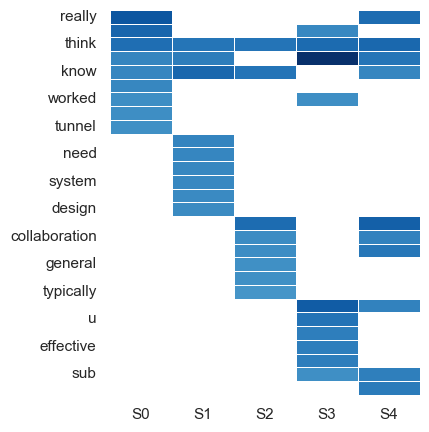

In [73]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 17'

In [74]:
i_stage = 'Sheet 17'

[(0,
  '0.032*"like" + 0.022*"know" + 0.022*"think" + 0.015*"someone" + '
  '0.013*"challenging" + 0.012*"okay" + 0.012*"happening" + 0.011*"need" + '
  '0.011*"find" + 0.009*"year"'),
 (1,
  '0.022*"think" + 0.017*"challenging" + 0.017*"like" + 0.014*"time" + '
  '0.011*"know" + 0.010*"really" + 0.009*"work" + 0.009*"aspect" + '
  '0.009*"want" + 0.009*"kind"'),
 (2,
  '0.021*"think" + 0.019*"know" + 0.018*"really" + 0.017*"work" + '
  '0.014*"challenge" + 0.013*"challenging" + 0.011*"like" + 0.010*"project" + '
  '0.010*"part" + 0.010*"arend"')]

Perplexity:  -6.208350341890487

Coherence Score:  0.3057610097268886
(20, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.034804  0.005562       1        1  44.728827
1      0.005205 -0.014686       2        1  36.569785
2      0.029599  0.009123       3        1  18.701388, topic_info=          Term       Freq      Total Category  logprob  loglift
3    challenge   4.000000   4.000000  Default  30.0000  30.0000
21      really   8.000000   8.000000  Default  29.0000  29.0000
58        work   7.000000   7.000000  Default  28.0000  28.0000
12       level   1.000000   1.000000  Default  27.0000  27.0000
11        know  14.000000  14.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
133  obviously   0.805766   3.978898   Topic3  -5.2426   0.0796
216       kind   0.895811   5.516536   Topic3  -5.1366  -0.1412
91        find   0.834756   6.443709   Topic3  -5.2072  -0.3671
226   probably   0.744736   3.255638   Topic3  -5.3213   0.2015
9         good   0.749373   4.067695   Topic3  -5.3151  -0.0150

[198 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
120       1  0.332092        able
120       2  0.332092        able
120       3  0.332092        able
325       1  0.495612  accustomed
325       2  0.495612  accustomed
...     ...       ...         ...
167       2  0.280858      worked
195       1  0.841264     working
195       2  0.280421     working
119       1  0.569562        year
119       2  0.189854        year

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

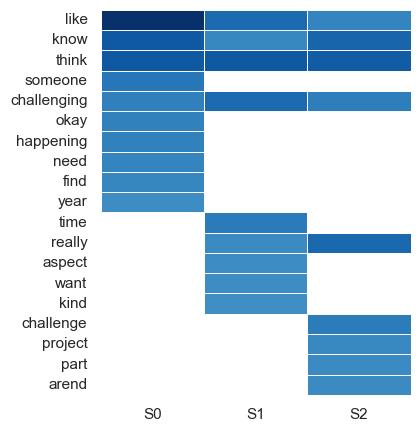

In [75]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.037*"like" + 0.024*"know" + 0.023*"think" + 0.018*"someone" + '
  '0.015*"happening" + 0.014*"okay" + 0.013*"need" + 0.013*"challenging" + '
  '0.012*"find" + 0.011*"year"'),
 (1,
  '0.024*"think" + 0.021*"challenging" + 0.018*"like" + 0.015*"time" + '
  '0.013*"aspect" + 0.011*"work" + 0.010*"want" + 0.009*"everyone" + '
  '0.009*"actually" + 0.009*"arend"'),
 (2,
  '0.022*"think" + 0.020*"work" + 0.019*"know" + 0.017*"really" + '
  '0.013*"challenge" + 0.012*"challenging" + 0.012*"like" + 0.012*"time" + '
  '0.012*"project" + 0.011*"part"'),
 (3,
  '0.018*"really" + 0.016*"know" + 0.016*"think" + 0.012*"challenge" + '
  '0.011*"challenging" + 0.010*"good" + 0.008*"trying" + 0.008*"kind" + '
  '0.008*"resource" + 0.008*"limited"')]

Perplexity:  -6.309258360657955

Coherence Score:  0.29185760210420114
(26, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.072365  0.011286       1        1  44.596128
2      0.024706  0.005428       2        1  27.332450
3      0.045771  0.016274       3        1  15.405953
1      0.001888 -0.032988       4        1  12.665469, topic_info=            Term       Freq      Total Category  logprob  loglift
3      challenge   5.000000   5.000000  Default  30.0000  30.0000
21        really   9.000000   9.000000  Default  29.0000  29.0000
4    challenging  10.000000  10.000000  Default  28.0000  28.0000
33        aspect   2.000000   2.000000  Default  27.0000  27.0000
26         think  17.000000  17.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
71          part   0.600553   4.332960   Topic4  -5.1468   0.0901
46           guy   0.616653   5.233458   Topic4  -5.1203  -0.0722
11          know   0.713626  15.543043   Topic4  -4.9743  -1.0147
72       project   0.621515   6.198711   Topic4  -5.1125  -0.2336
110          say   0.564219   4.962448   Topic4  -5.2092  -0.1079

[245 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
120       1  0.324995     able
120       2  0.324995     able
120       3  0.324995     able
120       4  0.324995     able
0         3  0.763526   access
...     ...       ...      ...
167       2  0.265436   worked
195       1  0.757265  working
195       2  0.252422  working
119       1  0.745301     year
119       2  0.186325     year

[270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

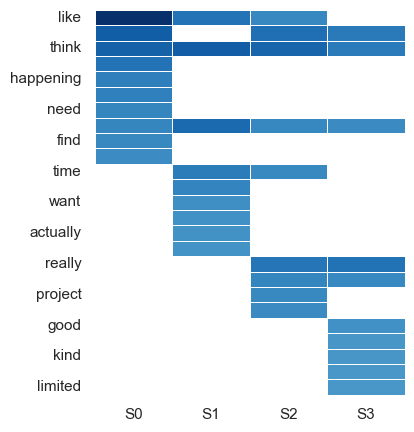

In [76]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.037*"like" + 0.026*"know" + 0.022*"think" + 0.020*"someone" + '
  '0.017*"happening" + 0.015*"okay" + 0.014*"need" + 0.012*"year" + '
  '0.012*"find" + 0.012*"challenging"'),
 (1,
  '0.028*"think" + 0.023*"challenging" + 0.019*"like" + 0.016*"time" + '
  '0.016*"aspect" + 0.012*"everyone" + 0.012*"work" + 0.011*"want" + '
  '0.010*"design" + 0.010*"communicated"'),
 (2,
  '0.022*"really" + 0.020*"know" + 0.017*"work" + 0.017*"think" + '
  '0.016*"challenge" + 0.012*"time" + 0.011*"like" + 0.010*"resource" + '
  '0.009*"specific" + 0.009*"kind"'),
 (3,
  '0.018*"really" + 0.017*"know" + 0.016*"think" + 0.012*"good" + '
  '0.011*"challenge" + 0.011*"trying" + 0.011*"challenging" + 0.010*"kind" + '
  '0.010*"found" + 0.009*"able"'),
 (4,
  '0.024*"think" + 0.020*"like" + 0.018*"challenging" + 0.016*"arend" + '
  '0.015*"work" + 0.014*"project" + 0.013*"part" + 0.013*"time" + 0.012*"know" '
  '+ 0.011*"difficult"')]

Perplexity:  -6.388347897866021

Coherence Score:  0.3103740466

/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.075290 -0.035501       1        1  33.345624
4     -0.035417  0.033176       2        1  24.640223
1      0.010523  0.035413       3        1  18.364949
3      0.074562 -0.020897       4        1  15.323468
2      0.025621 -0.012191       5        1   8.325736, topic_info=          Term       Freq      Total Category  logprob  loglift
21      really   8.000000   8.000000  Default  30.0000  30.0000
3    challenge   4.000000   4.000000  Default  29.0000  29.0000
33      aspect   3.000000   3.000000  Default  28.0000  28.0000
58        work   8.000000   8.000000  Default  27.0000  27.0000
11        know  14.000000  14.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
32       arend   0.382259   6.522718   Topic5  -5.1790  -0.3511
226   probably   0.337933   3.247885   Topic5  -5.3023   0.2229
308   industry   0.314489   2.322806   Topic5  -5.3742   0.4862
174      first   0.337023   4.194630   Topic5  -5.3050  -0.0356
75       thing   0.335603   5.005972   Topic5  -5.3092  -0.2166

[296 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
120       2  0.295210        able
120       3  0.295210        able
120       4  0.295210        able
0         4  0.785442      access
325       3  0.557530  accustomed
...     ...       ...         ...
195       1  0.496553     working
195       2  0.496553     working
119       1  0.574320        year
119       2  0.191440        year
119       3  0.191440        year

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

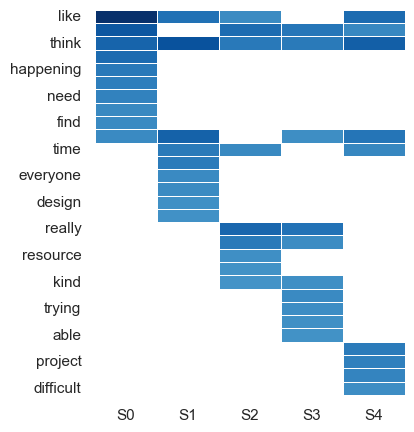

In [77]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 18'

In [78]:
i_stage = 'Sheet 18'

[(0,
  '0.022*"project" + 0.021*"like" + 0.016*"lot" + 0.016*"think" + 0.011*"time" '
  '+ 0.010*"skill" + 0.010*"sort" + 0.009*"working" + 0.009*"well" + '
  '0.009*"self"'),
 (1,
  '0.022*"think" + 0.021*"project" + 0.017*"lot" + 0.017*"working" + '
  '0.014*"arend" + 0.011*"helped" + 0.011*"really" + 0.011*"work" + '
  '0.010*"like" + 0.010*"uav"'),
 (2,
  '0.044*"think" + 0.016*"lot" + 0.015*"like" + 0.014*"project" + '
  '0.010*"technical" + 0.010*"arend" + 0.009*"skill" + 0.009*"helped" + '
  '0.009*"problem" + 0.009*"kind"')]

Perplexity:  -6.0709780841055565

Coherence Score:  0.311144110048084
(18, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.025606  0.009233       1        1  35.290936
1      0.000304 -0.018804       2        1  33.420777
2      0.025302  0.009570       3        1  31.288287, topic_info=           Term       Freq      Total Category  logprob  loglift
22        think  12.000000  12.000000  Default  30.0000  30.0000
93         self   2.000000   2.000000  Default  29.0000  29.0000
106    grateful   1.000000   1.000000  Default  28.0000  28.0000
25      working   5.000000   5.000000  Default  27.0000  27.0000
115         uav   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
52         yeah   1.091582   3.229596   Topic3  -4.9074   0.0772
117        able   0.994469   2.582438   Topic3  -5.0006   0.2076
152       thing   0.994572   3.185408   Topic3  -5.0005  -0.0021
57   especially   0.880219   2.576753   Topic3  -5.1226   0.0878
136       learn   0.904901   3.154328   Topic3  -5.0950  -0.0868

[181 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
117       1  0.387231         able
117       2  0.387231         able
117       3  0.387231         able
195       1  0.768924  aeronautics
27        3  0.793767     anything
...     ...       ...          ...
52        2  0.309636         yeah
52        3  0.309636         yeah
71        1  0.393104         year
71        2  0.393104         year
71        3  0.393104         year

[229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

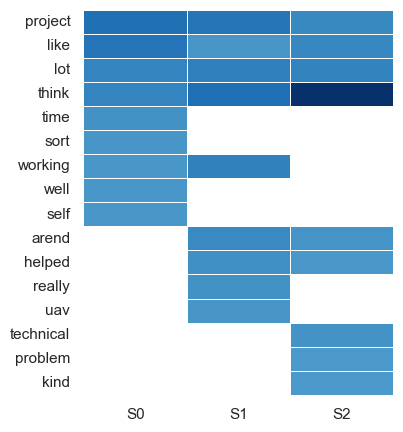

In [79]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.028*"project" + 0.024*"like" + 0.015*"lot" + 0.015*"think" + '
  '0.014*"skill" + 0.012*"self" + 0.012*"sort" + 0.012*"time" + '
  '0.009*"working" + 0.009*"learned"'),
 (1,
  '0.024*"think" + 0.021*"project" + 0.019*"lot" + 0.018*"working" + '
  '0.015*"arend" + 0.012*"work" + 0.012*"really" + 0.011*"helped" + '
  '0.011*"uav" + 0.010*"skill"'),
 (2,
  '0.050*"think" + 0.016*"lot" + 0.016*"like" + 0.015*"project" + '
  '0.013*"technical" + 0.010*"arend" + 0.010*"kind" + 0.010*"yeah" + '
  '0.010*"say" + 0.009*"growth"'),
 (3,
  '0.018*"think" + 0.014*"helped" + 0.011*"lot" + 0.011*"sense" + '
  '0.010*"working" + 0.010*"information" + 0.009*"grow" + 0.009*"technical" + '
  '0.009*"learn" + 0.008*"fix"')]

Perplexity:  -6.232621526566603

Coherence Score:  0.308409192152683
(25, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.012747  0.029524       1        1  33.774664
2      0.041694 -0.015227       2        1  30.819808
0     -0.033914 -0.027834       3        1  28.163973
3      0.004967  0.013537       4        1   7.241556, topic_info=            Term       Freq      Total Category  logprob  loglift
22         think  13.000000  13.000000  Default  30.0000  30.0000
10        helped   3.000000   3.000000  Default  29.0000  29.0000
25       working   4.000000   4.000000  Default  28.0000  28.0000
19         sense   2.000000   2.000000  Default  27.0000  27.0000
12   information   1.000000   1.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
39          like   0.269284   7.468388   Topic4  -4.8436  -0.6973
236         well   0.235839   3.141734   Topic4  -4.9763   0.0360
14          know   0.225797   2.461841   Topic4  -5.0198   0.2363
169         work   0.233694   3.797084   Topic4  -4.9854  -0.1626
98         arend   0.219600   5.270218   Topic4  -5.0476  -0.5527

[224 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
117       2  0.378910         able
117       3  0.378910         able
195       3  0.784491  aeronautics
53        2  0.746118        along
27        2  0.738689     anything
...     ...       ...          ...
52        2  0.307850         yeah
52        3  0.307850         yeah
71        1  0.372818         year
71        2  0.372818         year
71        3  0.372818         year

[226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

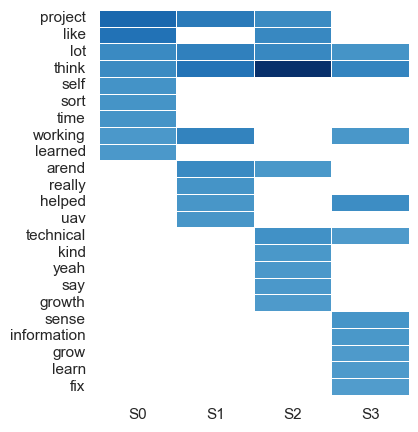

In [80]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.026*"project" + 0.026*"like" + 0.019*"lot" + 0.017*"skill" + '
  '0.016*"think" + 0.013*"sort" + 0.012*"self" + 0.012*"time" + '
  '0.011*"learned" + 0.011*"well"'),
 (1,
  '0.031*"think" + 0.029*"lot" + 0.017*"project" + 0.016*"work" + 0.013*"like" '
  '+ 0.013*"learn" + 0.011*"skill" + 0.011*"thing" + 0.010*"really" + '
  '0.010*"basically"'),
 (2,
  '0.059*"think" + 0.018*"like" + 0.018*"technical" + 0.015*"lot" + '
  '0.013*"kind" + 0.011*"yeah" + 0.011*"break" + 0.011*"quite" + '
  '0.011*"gained" + 0.010*"problem"'),
 (3,
  '0.017*"helped" + 0.013*"think" + 0.013*"information" + 0.012*"grow" + '
  '0.011*"sense" + 0.011*"working" + 0.010*"really" + 0.010*"group" + '
  '0.009*"different" + 0.009*"good"'),
 (4,
  '0.027*"project" + 0.023*"arend" + 0.020*"think" + 0.020*"working" + '
  '0.015*"gonna" + 0.014*"design" + 0.013*"helped" + 0.013*"uav" + '
  '0.013*"team" + 0.012*"growth"')]

Perplexity:  -6.287184047496925

Coherence Score:  0.4736957950173203
(36, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.068400 -0.016545       1        1  40.058744
4     -0.069203 -0.034479       2        1  26.654781
1      0.038085  0.006966       3        1  18.491996
2     -0.027460  0.061627       4        1   7.692950
3     -0.009822 -0.017569       5        1   7.101529, topic_info=            Term       Freq      Total Category  logprob  loglift
22         think  10.000000  10.000000  Default  30.0000  30.0000
40           lot   7.000000   7.000000  Default  29.0000  29.0000
10        helped   3.000000   3.000000  Default  28.0000  28.0000
50     technical   3.000000   3.000000  Default  27.0000  27.0000
12   information   1.000000   1.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
250  perspective   0.197519   1.851754   Topic5  -5.1340   0.4068
25       working   0.352751   5.302554   Topic5  -4.5541  -0.0653
22         think   0.432954  10.795657   Topic5  -4.3492  -0.5714
40           lot   0.275215   7.638678   Topic5  -4.8023  -0.6786
52          yeah   0.221097   3.058147   Topic5  -5.0213   0.0179

[257 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.863706  across
53        2  0.786645   along
155       3  0.935675  amount
98        1  0.192354   arend
98        2  0.577062   arend
...     ...       ...     ...
26        2  0.871715   world
52        1  0.326995    yeah
52        3  0.326995    yeah
71        1  0.379110    year
71        2  0.379110    year

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 4])

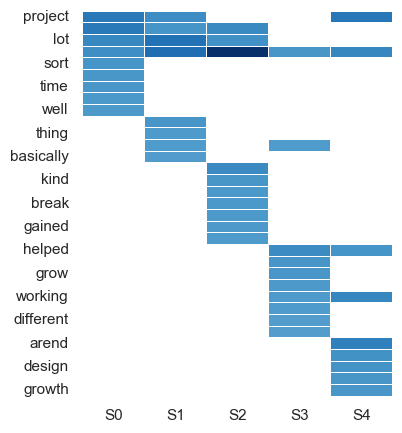

In [81]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 19'

In [82]:
i_stage = 'Sheet 19'

[(0,
  '0.022*"like" + 0.017*"think" + 0.016*"know" + 0.015*"lot" + 0.014*"mean" + '
  '0.011*"team" + 0.011*"part" + 0.011*"work" + 0.010*"yeah" + 0.010*"good"'),
 (1,
  '0.018*"work" + 0.018*"think" + 0.015*"like" + 0.012*"know" + 0.011*"smith" '
  '+ 0.011*"arend" + 0.011*"good" + 0.011*"lelanie" + 0.011*"transition" + '
  '0.009*"personality"'),
 (2,
  '0.031*"like" + 0.021*"think" + 0.012*"know" + 0.012*"really" + '
  '0.011*"lelanie" + 0.010*"communication" + 0.010*"someone" + 0.010*"thing" + '
  '0.010*"fear" + 0.009*"lot"')]

Perplexity:  -6.220800743866893

Coherence Score:  0.34617056153605413
(20, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.029729 -0.005789       1        1  47.659251
1      0.025778 -0.008933       2        1  31.806241
2      0.003951  0.014722       3        1  20.534507, topic_info=           Term       Freq      Total Category  logprob  loglift
28         like  11.000000  11.000000  Default  30.0000  30.0000
105  transition   2.000000   2.000000  Default  29.0000  29.0000
114        fear   2.000000   2.000000  Default  28.0000  28.0000
35        thing   3.000000   3.000000  Default  27.0000  27.0000
45      project   2.000000   2.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
18         work   0.809479   6.419485   Topic3  -4.8725  -0.4876
179      senior   0.567547   2.456016   Topic3  -5.2275   0.1181
203     example   0.601920   3.084588   Topic3  -5.1687  -0.0510
51       always   0.607651   3.350148   Topic3  -5.1593  -0.1241
49         team   0.632570   4.737048   Topic3  -5.1191  -0.4303

[185 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
51        1  0.596989     always
51        2  0.298494     always
51        3  0.298494     always
238       1  0.477705      apart
238       2  0.477705      apart
...     ...       ...        ...
106       2  0.527562    working
145       2  0.581695  workplace
19        1  0.647983       yeah
19        2  0.215994       yeah
19        3  0.215994       yeah

[181 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

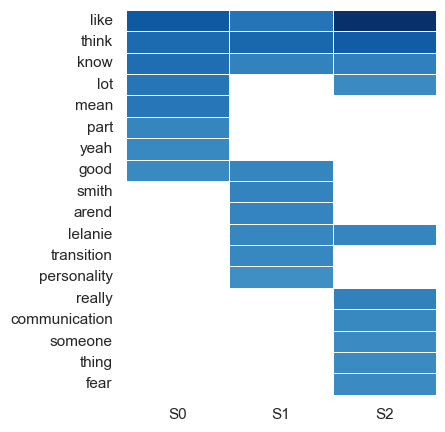

In [83]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.021*"like" + 0.017*"think" + 0.017*"know" + 0.016*"lot" + 0.015*"mean" + '
  '0.014*"work" + 0.013*"yeah" + 0.012*"team" + 0.011*"good" + 0.011*"part"'),
 (1,
  '0.020*"work" + 0.019*"think" + 0.016*"good" + 0.014*"like" + 0.013*"know" + '
  '0.013*"arend" + 0.011*"job" + 0.011*"smith" + 0.011*"transition" + '
  '0.011*"helped"'),
 (2,
  '0.028*"like" + 0.018*"think" + 0.013*"really" + 0.013*"know" + '
  '0.011*"lelanie" + 0.010*"smith" + 0.009*"yeah" + 0.009*"hand" + '
  '0.008*"gonna" + 0.008*"dr"'),
 (3,
  '0.030*"like" + 0.021*"think" + 0.016*"communication" + 0.014*"someone" + '
  '0.014*"fear" + 0.012*"lot" + 0.012*"team" + 0.011*"lelanie" + 0.011*"might" '
  '+ 0.011*"smooth"')]

Perplexity:  -6.345927186961313

Coherence Score:  0.4099200223881794
(25, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.017612 -0.039896       1        1  42.911357
1      0.038330  0.032795       2        1  40.696055
3     -0.051386  0.011147       3        1  13.839034
2     -0.004555 -0.004046       4        1   2.553554, topic_info=            Term       Freq      Total Category  logprob  loglift
28          like  10.000000  10.000000  Default  30.0000  30.0000
16         think   9.000000   9.000000  Default  29.0000  29.0000
14        really   3.000000   3.000000  Default  28.0000  28.0000
26          know   7.000000   7.000000  Default  27.0000  27.0000
10       lelanie   4.000000   4.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
172  personality   0.087714   3.346429   Topic4  -5.0102   0.0261
179       senior   0.077818   2.536463   Topic4  -5.1299   0.1835
23          good   0.093654   6.063142   Topic4  -4.9446  -0.5027
67          part   0.082479   4.214452   Topic4  -5.0717  -0.2660
18          work   0.081009   7.679418   Topic4  -5.0897  -0.8841

[237 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
51        1  0.319404     always
51        2  0.319404     always
238       1  0.475096      apart
238       2  0.475096      apart
147       1  0.874485       area
...     ...       ...        ...
106       1  0.448153    working
106       2  0.448153    working
145       2  0.934564  workplace
19        1  0.596729       yeah
19        2  0.397819       yeah

[178 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

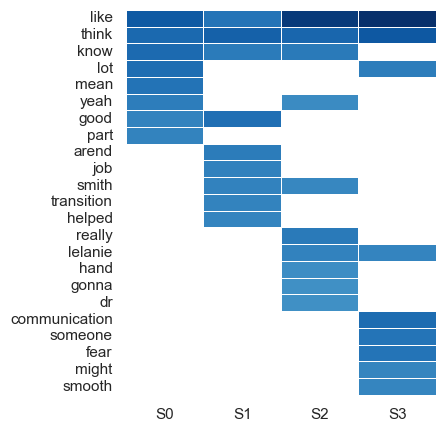

In [84]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.020*"lot" + 0.020*"like" + 0.018*"mean" + 0.017*"think" + 0.016*"know" + '
  '0.015*"work" + 0.014*"team" + 0.013*"good" + 0.013*"yeah" + 0.012*"u"'),
 (1,
  '0.020*"like" + 0.017*"transition" + 0.017*"arend" + 0.016*"good" + '
  '0.015*"think" + 0.015*"smith" + 0.014*"work" + 0.013*"know" + '
  '0.011*"personality" + 0.010*"say"'),
 (2,
  '0.029*"like" + 0.017*"know" + 0.017*"think" + 0.014*"smith" + '
  '0.013*"really" + 0.012*"yeah" + 0.012*"good" + 0.010*"gonna" + 0.010*"hand" '
  '+ 0.009*"always"'),
 (3,
  '0.033*"like" + 0.020*"think" + 0.018*"communication" + 0.017*"fear" + '
  '0.017*"someone" + 0.014*"lot" + 0.013*"team" + 0.013*"smooth" + '
  '0.012*"might" + 0.012*"thing"'),
 (4,
  '0.024*"think" + 0.020*"work" + 0.019*"lelanie" + 0.017*"quite" + '
  '0.017*"example" + 0.014*"inspirational" + 0.012*"really" + 0.012*"problem" '
  '+ 0.011*"like" + 0.011*"know"')]

Perplexity:  -6.413195929480988

Coherence Score:  0.3826904490467947
(30, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.030886 -0.030984       1        1  33.094404
2     -0.011928  0.017872       2        1  20.919331
4     -0.028064 -0.051498       3        1  18.557926
1     -0.049243  0.037596       4        1  13.719872
3      0.058348  0.027014       5        1  13.708467, topic_info=              Term       Freq      Total Category  logprob  loglift
105     transition   1.000000   1.000000  Default  30.0000  30.0000
114           fear   2.000000   2.000000  Default  29.0000  29.0000
28            like  11.000000  11.000000  Default  28.0000  28.0000
13           quite   2.000000   2.000000  Default  27.0000  27.0000
108  communication   2.000000   2.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
126       question   0.534333   1.820322   Topic5  -4.8837   0.7614
14          really   0.561284   4.689003   Topic5  -4.8345  -0.1356
125          place   0.530129   1.832397   Topic5  -4.8916   0.7469
51          always   0.534231   3.300834   Topic5  -4.8839   0.1661
20              dr   0.521514   3.161279   Topic5  -4.9080   0.1852

[263 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
236       1  0.482420      able
237       1  0.483498  actually
51        1  0.302954    always
51        2  0.302954    always
51        5  0.302954    always
...     ...       ...       ...
235       3  0.546476   writing
19        1  0.405015      yeah
19        2  0.202508      yeah
19        3  0.202508      yeah
19        4  0.202508      yeah

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])

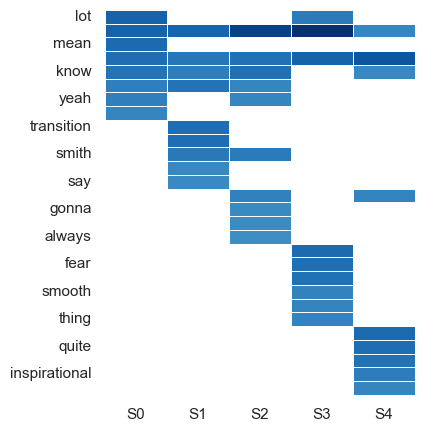

In [85]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 20'

In [86]:
i_stage = 'Sheet 20'

[(0,
  '0.016*"think" + 0.015*"work" + 0.012*"really" + 0.012*"working" + '
  '0.010*"thing" + 0.010*"experience" + 0.010*"different" + 0.009*"project" + '
  '0.009*"know" + 0.009*"kind"'),
 (1,
  '0.013*"kind" + 0.013*"working" + 0.012*"really" + 0.012*"know" + '
  '0.012*"like" + 0.012*"think" + 0.009*"actually" + 0.008*"able" + '
  '0.008*"work" + 0.008*"team"'),
 (2,
  '0.016*"think" + 0.014*"know" + 0.013*"work" + 0.013*"kind" + 0.011*"really" '
  '+ 0.010*"lot" + 0.010*"project" + 0.009*"thing" + 0.008*"aspect" + '
  '0.008*"basically"')]

Perplexity:  -6.482846943107811

Coherence Score:  0.18544666591038128
(17, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.014917 -0.005631       1        1  38.765233
1      0.015005 -0.005533       2        1  32.047632
0     -0.000088  0.011163       3        1  29.187136, topic_info=           Term      Freq     Total Category  logprob  loglift
66    basically  3.000000  3.000000  Default  30.0000  30.0000
29      working  8.000000  8.000000  Default  29.0000  29.0000
4     different  5.000000  5.000000  Default  28.0000  28.0000
0          able  4.000000  4.000000  Default  27.0000  27.0000
363       world  2.000000  2.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
196  university  1.436434  4.607605   Topic3  -5.1954   0.0659
15          lot  1.617558  6.389338   Topic3  -5.0766  -0.1423
162    actually  1.548386  5.854255   Topic3  -5.1203  -0.0985
123        even  1.414030  5.378761   Topic3  -5.2111  -0.1046
325        well  1.329823  4.793031   Topic3  -5.2725  -0.0507

[205 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.223364      able
0         2  0.446727      able
0         3  0.223364      able
207       1  0.562998  academic
207       2  0.281499  academic
...     ...       ...       ...
161       2  0.426656      yeah
161       3  0.213328      yeah
115       1  0.501285      year
115       2  0.250643      year
115       3  0.250643      year

[281 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

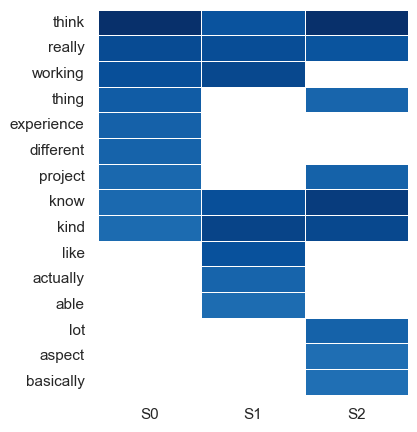

In [87]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.012*"really" + 0.011*"working" + 0.011*"work" + 0.010*"kind" + '
  '0.009*"thing" + 0.008*"like" + 0.008*"got" + 0.008*"know" + 0.008*"project" '
  '+ 0.008*"experience"'),
 (1,
  '0.016*"kind" + 0.013*"working" + 0.012*"really" + 0.011*"know" + '
  '0.011*"like" + 0.010*"actually" + 0.008*"time" + 0.008*"solution" + '
  '0.008*"think" + 0.008*"work"'),
 (2,
  '0.016*"kind" + 0.015*"think" + 0.015*"basically" + 0.014*"know" + '
  '0.014*"work" + 0.011*"lot" + 0.011*"project" + 0.010*"really" + '
  '0.009*"look" + 0.008*"thing"'),
 (3,
  '0.023*"think" + 0.015*"work" + 0.014*"different" + 0.013*"really" + '
  '0.012*"working" + 0.012*"know" + 0.011*"thing" + 0.010*"experience" + '
  '0.010*"arend" + 0.010*"team"')]

Perplexity:  -6.618635615854113

Coherence Score:  0.19093164437854407
(20, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.045103 -0.008725       1        1  40.909993
2     -0.034508 -0.015461       2        1  34.825468
1     -0.006206  0.018631       3        1  19.057027
0     -0.004389  0.005554       4        1   5.207513, topic_info=          Term       Freq      Total Category  logprob  loglift
29     working   8.000000   8.000000  Default  30.0000  30.0000
176       kind  10.000000  10.000000  Default  29.0000  29.0000
66   basically   5.000000   5.000000  Default  28.0000  28.0000
21      really  10.000000  10.000000  Default  27.0000  27.0000
91         got   4.000000   4.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
15         lot   0.269267   6.763987   Topic4  -5.1460  -0.2686
26       think   0.339708  14.678438   Topic4  -4.9136  -0.8110
24        team   0.251454   5.913099   Topic4  -5.2144  -0.2026
8         good   0.230879   5.039509   Topic4  -5.2998  -0.1281
4    different   0.215252   6.326930   Topic4  -5.3699  -0.4257

[251 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.454179      able
0         2  0.227089      able
0         3  0.227089      able
207       1  0.287913  academic
207       2  0.575825  academic
...     ...       ...       ...
161       2  0.214147      yeah
161       3  0.214147      yeah
115       1  0.262527      year
115       2  0.262527      year
115       3  0.262527      year

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

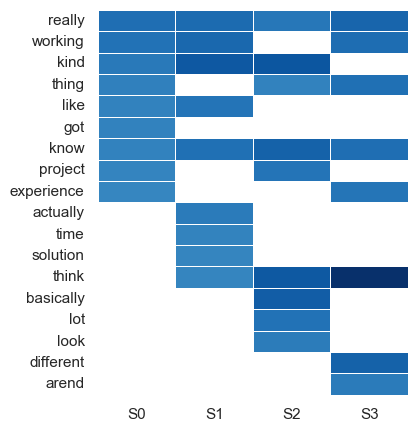

In [88]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.013*"think" + 0.012*"work" + 0.011*"kind" + 0.011*"really" + '
  '0.009*"thing" + 0.009*"project" + 0.009*"like" + 0.009*"working" + '
  '0.008*"basically" + 0.008*"know"'),
 (1,
  '0.016*"kind" + 0.014*"really" + 0.014*"working" + 0.012*"know" + '
  '0.012*"like" + 0.010*"actually" + 0.009*"able" + 0.008*"work" + '
  '0.008*"time" + 0.008*"solution"'),
 (2,
  '0.015*"kind" + 0.015*"work" + 0.014*"really" + 0.011*"lot" + 0.011*"good" + '
  '0.010*"know" + 0.010*"thing" + 0.010*"project" + 0.008*"academic" + '
  '0.008*"got"'),
 (3,
  '0.018*"think" + 0.017*"work" + 0.013*"different" + 0.013*"working" + '
  '0.013*"really" + 0.012*"experience" + 0.011*"team" + 0.010*"project" + '
  '0.010*"thing" + 0.009*"side"'),
 (4,
  '0.024*"think" + 0.022*"know" + 0.016*"aspect" + 0.012*"technical" + '
  '0.011*"like" + 0.010*"learned" + 0.010*"kind" + 0.010*"thing" + '
  '0.009*"working" + 0.009*"arend"')]

Perplexity:  -6.790074611636433

Coherence Score:  0.22252780594290908
(26, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.052985 -0.011270       1        1  39.945713
2     -0.019636  0.031056       2        1  30.464610
1     -0.016403 -0.001348       3        1  18.980284
0      0.014255  0.013410       4        1   6.490623
4     -0.031201 -0.031848       5        1   4.118770, topic_info=          Term       Freq      Total Category  logprob  loglift
26       think  11.000000  11.000000  Default  30.0000  30.0000
13        know   8.000000   8.000000  Default  29.0000  29.0000
31      aspect   2.000000   2.000000  Default  28.0000  28.0000
14        like   6.000000   6.000000  Default  27.0000  27.0000
176       kind  10.000000  10.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
4    different   0.267730   6.203919   Topic5  -4.9171   0.0467
21      really   0.298409  11.507323   Topic5  -4.8086  -0.4627
123       even   0.217045   5.543810   Topic5  -5.1270  -0.0507
28        work   0.218879  12.250792   Topic5  -5.1186  -0.8352
156       time   0.212956   6.129612   Topic5  -5.1460  -0.1702

[295 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.460848      able
0         3  0.460848      able
207       1  0.251135  academic
207       2  0.502271  academic
207       3  0.251135  academic
...     ...       ...       ...
161       2  0.207679      yeah
161       3  0.207679      yeah
115       1  0.236326      year
115       2  0.472652      year
115       3  0.236326      year

[250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

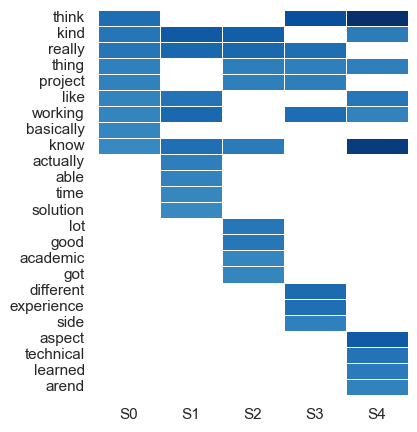

In [89]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

###  'Sheet 21'

In [90]:
i_stage = 'Sheet 21'

[(0,
  '0.038*"think" + 0.021*"lot" + 0.020*"arend" + 0.019*"like" + 0.018*"really" '
  '+ 0.016*"time" + 0.013*"know" + 0.013*"project" + 0.012*"especially" + '
  '0.011*"going"'),
 (1,
  '0.033*"like" + 0.028*"think" + 0.027*"really" + 0.023*"sort" + '
  '0.021*"arend" + 0.016*"time" + 0.015*"point" + 0.014*"going" + 0.014*"lot" '
  '+ 0.012*"year"'),
 (2,
  '0.034*"think" + 0.028*"like" + 0.026*"arend" + 0.020*"want" + 0.015*"time" '
  '+ 0.013*"university" + 0.013*"flying" + 0.013*"thing" + 0.012*"see" + '
  '0.012*"lot"')]

Perplexity:  -5.691052435768032

Coherence Score:  0.41754297404694823
(18, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.020005 -0.0       1        1  50.287775
0     -0.006743 -0.0       2        1  28.654527
1      0.026748 -0.0       3        1  21.057698, topic_info=           Term      Freq     Total Category  logprob  loglift
48         sort  1.000000  1.000000  Default  30.0000  30.0000
26       really  4.000000  4.000000  Default  29.0000  29.0000
41         like  7.000000  7.000000  Default  28.0000  28.0000
45        point  2.000000  2.000000  Default  27.0000  27.0000
40      lelanie  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
24      project  0.580120  3.130433   Topic3  -4.6250  -0.1278
85         know  0.553421  3.156316   Topic3  -4.6721  -0.1831
31   university  0.537939  3.264795   Topic3  -4.7005  -0.2453
111        mean  0.472581  2.465118   Topic3  -4.8300  -0.0939
165        want  0.479759  4.221781   Topic3  -4.8149  -0.6168

[179 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
122       1  0.487284  aeroplane
72        1  0.498108   anything
72        2  0.498108   anything
123       1  0.744227   anywhere
5         1  0.616801      arend
...     ...       ...        ...
68        1  0.388514       work
68        2  0.388514       work
49        1  0.640911       year
49        2  0.320456       year
49        3  0.320456       year

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

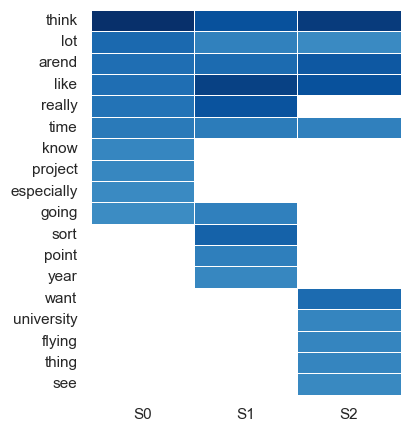

In [91]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 3

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.040*"think" + 0.023*"lot" + 0.020*"really" + 0.020*"like" + 0.018*"arend" '
  '+ 0.015*"know" + 0.014*"time" + 0.014*"especially" + 0.013*"project" + '
  '0.012*"oh"'),
 (1,
  '0.038*"like" + 0.028*"think" + 0.027*"sort" + 0.025*"really" + '
  '0.022*"arend" + 0.016*"lot" + 0.015*"point" + 0.015*"year" + 0.014*"time" + '
  '0.013*"lelanie"'),
 (2,
  '0.040*"think" + 0.031*"arend" + 0.026*"like" + 0.024*"want" + 0.017*"time" '
  '+ 0.016*"university" + 0.015*"thing" + 0.015*"flying" + 0.014*"lot" + '
  '0.013*"project"'),
 (3,
  '0.027*"going" + 0.023*"like" + 0.022*"know" + 0.019*"think" + '
  '0.018*"really" + 0.018*"time" + 0.017*"mean" + 0.015*"person" + '
  '0.015*"arend" + 0.011*"well"')]

Perplexity:  -5.824130572670295

Coherence Score:  0.5154577933865054
(22, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.012647  0.025416       1        1  35.052513
0      0.011478 -0.000038       2        1  31.491475
1     -0.033489  0.001946       3        1  20.465416
3      0.009363 -0.027324       4        1  12.990596, topic_info=           Term      Freq     Total Category  logprob  loglift
48         sort  2.000000  2.000000  Default  30.0000  30.0000
53        going  2.000000  2.000000  Default  29.0000  29.0000
85         know  2.000000  2.000000  Default  28.0000  28.0000
26       really  4.000000  4.000000  Default  27.0000  27.0000
115      person  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
30        think  0.703500  9.867003   Topic4  -3.9491  -0.5999
5         arend  0.545644  6.506795   Topic4  -4.2032  -0.4377
165        want  0.361897  4.009982   Topic4  -4.6138  -0.3642
9    especially  0.340408  2.518443   Topic4  -4.6750   0.0397
45        point  0.332791  2.334798   Topic4  -4.6976   0.0928

[215 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
70        2  0.773927         add
1         2  0.794308  advertised
122       1  0.506682   aeroplane
72        1  0.512256    anything
72        2  0.512256    anything
...     ...       ...         ...
68        2  0.391969        work
69        1  0.533605     working
49        1  0.318552        year
49        2  0.318552        year
49        3  0.318552        year

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

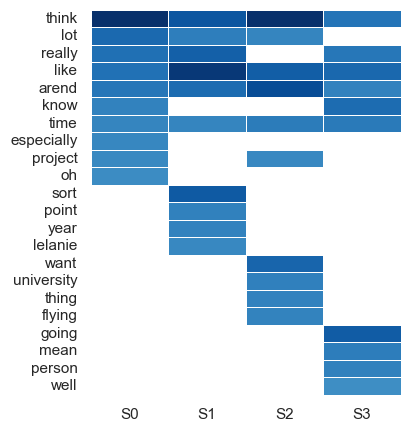

In [92]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 4

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared

[(0,
  '0.038*"think" + 0.026*"lot" + 0.024*"like" + 0.021*"arend" + '
  '0.015*"project" + 0.014*"saw" + 0.014*"want" + 0.013*"university" + '
  '0.013*"year" + 0.012*"see"'),
 (1,
  '0.038*"really" + 0.035*"think" + 0.034*"like" + 0.027*"sort" + '
  '0.024*"arend" + 0.023*"time" + 0.020*"point" + 0.018*"going" + '
  '0.015*"lelanie" + 0.014*"lot"'),
 (2,
  '0.034*"like" + 0.029*"think" + 0.024*"arend" + 0.020*"want" + '
  '0.015*"following" + 0.015*"must" + 0.014*"oh" + 0.014*"see" + 0.014*"good" '
  '+ 0.014*"year"'),
 (3,
  '0.028*"know" + 0.027*"going" + 0.023*"like" + 0.023*"mean" + 0.019*"person" '
  '+ 0.017*"think" + 0.016*"really" + 0.016*"well" + 0.015*"arend" + '
  '0.015*"want"'),
 (4,
  '0.045*"think" + 0.026*"arend" + 0.021*"lot" + 0.021*"time" + '
  '0.017*"project" + 0.017*"university" + 0.014*"really" + 0.014*"want" + '
  '0.013*"like" + 0.012*"bit"')]

Perplexity:  -6.063002582970888

Coherence Score:  0.42709601086308124
(25, 1)


/Users/qt39678/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.047828  0.006047       1        1  50.598731
1      0.064260 -0.015490       2        1  20.370872
4      0.002340 -0.024858       3        1  14.758323
3      0.018361  0.047149       4        1  12.881667
0     -0.037132 -0.012848       5        1   1.390407, topic_info=       Term      Freq     Total Category  logprob  loglift
30    think  8.000000  8.000000  Default  30.0000  30.0000
17      lot  3.000000  3.000000  Default  29.0000  29.0000
41     like  8.000000  8.000000  Default  28.0000  28.0000
5     arend  6.000000  6.000000  Default  27.0000  27.0000
26   really  3.000000  3.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
135  flying  0.035790  2.873392   Topic5  -4.6929  -0.1100
97    still  0.034924  2.753955   Topic5  -4.7174  -0.0920
65     time  0.039464  4.399540   Topic5  -4.5951  -0.4383
163   thing  0.035019  2.904212   Topic5  -4.7147  -0.1425
121    well  0.032120  2.490791   Topic5  -4.8011  -0.0753

[259 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
70        1  0.700753        add
122       1  0.483571  aeroplane
71        1  0.669274     always
72        1  0.482206   anything
5         1  0.466176      arend
...     ...       ...        ...
121       4  0.401479       well
68        1  0.744942       work
69        1  0.512879    working
49        1  0.610881       year
49        2  0.305440       year

[113 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 4, 1])

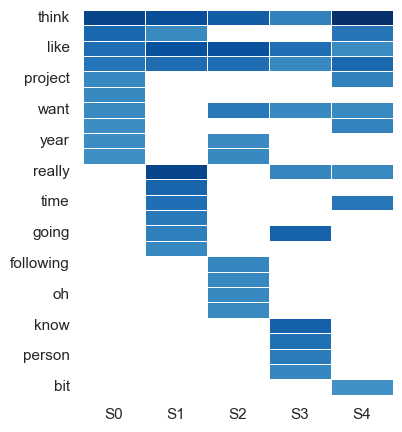

In [93]:
# random state 2
topics = []
i_random_state = 2  
num_topics = 5

LDAvis_prepared, topics = do_topic_model(df_text, i_stage, num_topics, i_random_state)
ex_list = ['within', 'sharing', 'within', 'idea', 'session', 'work', 'team', 'exposure', 'skill']    
visualize_topic_modeling(i_stage, topics, ex_list)

LDAvis_prepared